# Milestone 4 - Independent Project

## Author - Lawrence Huang

#### For Milestone 4 you should
<ul>
    <li>update Milestones 1 through 3, and assignment 9 based on feedback;</li>
<li>enhance your model results by trying different model and/or data enhancement techniques (Build 3 models with different enhancements and feature engineering techniques);</li>
    <li>explain your choice of model and model accuracy; and</li>
<li>draw direct inferences and conclusions from model results (describe how your model results can improve or provide a solution to the problem you have chosen). Use graphs and evidence from the data to prove your point. Part of being a data scientist is to tell a story that helps the business.</li>

For this Milestone, you focus on improving model accuracy and summarizing your findings. Try explaining your findings as if you are presenting to your management team in layman’s terms. For example, talk about the influencing factors, what can be improved, what is important in your findings, what is the key aspect to focus on, what do the data tell them that they do not know.

### Table of Contents<a name="Contents"></a>
##### [Abstract](#Section0)
##### [Section 1 / Milestone 1: Exploratory data analysis](#Section1)
##### [Section 2 / Milestone 2: Hypothesis tests](#Section2)
##### [Section 3 / Milestone 3 & 4: Modeling](#Section3)
For Milestone 4, additional feature engineering strategies were tested:<br>
[1. transform sqft_lot](#sqft_lot)<br>
[2. transform sqft_basement](#sqft_basement)

Models:<br>
[1. Linear regression](#model1)<br>
[2. Regularized linear regression (Elastic net)](#model2)<br>
[3. Support vector regression](#model3)<br>
[4. XGBoost](#model4)
##### [Section 4 / Assignment 9: Reframed problem-predict whether house price exceeds 500K](#Section4)
Model: Naive Bayes classifier

### Abstract <a name="Section0"></a>
<b>Problem statement and use case:</b> Predict the price of a house in King County. A developer interested in acquiring properties in King County, Washington is interested in what home features (zip code, structure, etc) would yield a high price.
<p>
<b>Methods:</b> Multiple chart types and aesthetics, as well as summary statistics, were used to visually explore different aspects of the dataset. Several features in the dataset were further explored by fitting and testing their distributions and computing their summary statistics. Different hypothesis tests were used to determine if the differences in pairs and multiple populations are significant. After data preparation, 4 models were constructed to predict house price: (1) linear regression; (2) regularized linear regression using elastic net; (3) support vector regresion (SVR, with linear and rbf kernels); and (4) extreme gradient boosting (XGBoost). Finally, the problem was reframed as a binary classification problem and the Naive Bayes classifier was used to predict whether house price exceeds 500K.
<p>
<b>Results:</b> Overall, all 4 models tested here provided comparable adjusted R2 (ranging from 0.86 to 0.88, suggesting that they explain a reasonable ~88% of the variance of the data). Some models, such as SVR and XGBoost, could be futher tuned to improve performance. However, given the comparable performances of models of different types, other steps in model building, such as additional iterations of feature engineering, may provide larger model improvements. 
On the test set, the SVR (rbf kernel) and XGBoost were the most accurate. However, for better interpretability one may prefer the linear regression/elastic net models which provide feature coefficients (or the SVR model with linear kernel, which also provides the feature weights). Across models, zipcode 98004, 98039, 98112, 98040 consistently had the largest coefficients, reflecting their importance in determining house price and was consist with trends identified during exploratory data analysis. Latititue and measure of house size (total living space and lot size) were also important indicators of price. Finally, leveraging the Naive Bayes classifier to predict whether house price exceeds 500K required binning of numerical features. As this conversion to categorical features resulted in the loss of information, an accuracy of ~74% was reasonable. 
<p>
    <b>Conclusions:</b> Together, these results provide a framework to estimate house prices in King County, and quantitative insights into most important home features that determine the sale price. Using these data, the developer could assess with confidence whehter properties are offered at a fair price and thus make informed purchasing decisions. The models in this study could also be scaled to include and facilitate comparisons between multiple housing markets.

<b>Location for dataset:</b> https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv

[Back to Table of Contents](#Contents)

### Section 1 / Milestone 1: Exploratory data analysis<a name="Section1"></a>
For Milestone 1 you should
<ul>
<li>provide an introduction with a statement of the problem you are addressing and a summary of your conclusions; and</li>
<li>examine several aspects of the dataset by applying multiple chart types and aesthetics. Explain which aspects are important, and why.</li>
    </ul>

##### Instructions
<ul>
<li>Generate a clear statement problem and provide location for dataset</li>
<li>Provide a clear solution to the problem for a non-technical audience</li>
<li>Visually explore the data to generate insight and include summary statistics</li>
    </ul>

### Solution for Section 1:
For this part of the project, multiple chart types and aesthetics, as well as summary statistics, were used to visually explore different aspects of the dataset.

##### Analysis methods include:
<li>historgram, heatmap, box plot, scatter plot, line plot, bar plot, and facet grid</li>
<li>summary statistics (mean, median, standard deviation)</li>

##### Aspects of the dataset explored include:
<li>variable distribution before and after transformation</li>
<li>the relationship between variables, and the relationship between variables and the target variable (outcome)</li>
<li>new variables (potential new features) to yield additional insight</li>

### Summary of findings for Section 1:<a name="Section1summary"></a>
##### Please see Markdown cells below plots for additional conclusions from exploratory data analysis
<ul>
<li>The target variable price is positively-skewed with a long right tail; a log transform (price_log) creates a distribution closer to a normal distribution.</li>
<li>Houses with waterfront view, higher condition, higher view, and higher grade generally have higher median price_log.</li>
<li>Houses with more bedrooms, bathrooms, floors, and higher sqft_living and latitude generally have higher median price_log.</li>
<li>grade, sqft_living, sqft_living15, sqft_above, bathrooms have the highest linear correlation with price_log.</li>
<p>
<li>sqft_living15, sqft_lot15 are colinear to other features of similar names (sqft_living, sqft_lot, respectively). Differences between these similar named variables are unclear.</li>
<li>sqft_living = sqft_above + sqft_basement; there are many zeros in sqft_basement, so sqft_above dominates sqft_living.</li>
<li>For bedrooms, there is 1 observation of 33 bedrooms (a potential outlier; greater than mean+2*std)</li>
<p>
<li>Most houses have not been renovated; for houses that have been renovated, mean yr_built = 1940.</li>
<li>Overall, renovated houses have higher median price_log vs. not renovated.</li>
<li>price_log could be better predicted by new feature "yr_built_renovated" (the more recent of yr_built and yr_renovated; taking in account any renovations) than yr_built alone.</li>
<p>
<li>Over ~1 year, there does not appear to be a strong price trend based on date.</li>
<p>
<li>There is a large range of number of transactions (number of observations/rows) and median price by zipcodes.</li>
<li>Highest median price: Medina, WA 98039, Bellevue, WA 98004, Mercer Island, WA 98040.</li>
    </ul>

In [1]:
# Load necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
# Load data
url = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
house = pd.read_csv(url)

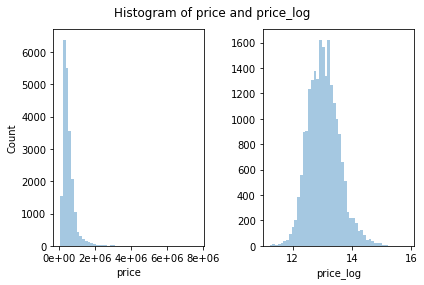

In [3]:
# price is positively-skewed with a long right tail; 
# a log transform creates a distribution closer to a normal distribution.
house['price_log'] = np.log(house['price'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['price'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['price_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of price and price_log')
plt.show()

<b>Observation</b>:<li>Price is positively-skewed with a long right tail; a log transform creates a distribution closer to a normal distribution.</li>

In [4]:
# Determine whether variables are numeric or categorical
print('data type:')
print(house.dtypes)
print('\n')
print('unique levels:')
print(house.nunique())

data type:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price_log        float64
dtype: object


unique levels:
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat              

<b>Observation</b>:
<li>waterfront, view, condition, grade are categorical because they have a small number of discrete numeric values and are qualitative.</li>
<li>zipcode is fundamentally categorical.</li>
<li>id appears to be independent of price (it is a "key", with with almost as many unique values as observations).</li>

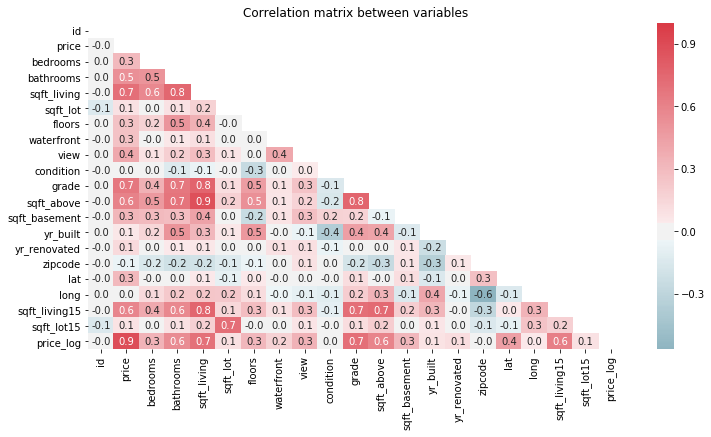

In [5]:
# Examine correlation between variables.
corrmat = house.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True) # diverging colormap
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
sns.heatmap(corrmat, mask=mask, annot=True, cmap=cmap, fmt='.1f', center=0, ax=ax)
ax.set_title('Correlation matrix between variables')
plt.show()

In [6]:
# Find variables with high linear correlation with price log
print('correlation with price_log:\n')
print(corrmat['price_log'].sort_values(ascending=False).drop(labels=['price', 'price_log']))
print('\n#############################\n')


# Examine sqft_basement
print('sqft_basement:\n')
print(house['sqft_basement'].describe())
print('\n#############################\n')

# Test whether sqft_living is sqft_above plus sqft_basement
print('number of observations where sqft_living = sqft_above+sqft_basement: {}'.format(sum(house['sqft_living'] == house['sqft_above']+house['sqft_basement'])))
print('number of total observations: {}'.format(house.shape[0]))

correlation with price_log:

grade            0.703634
sqft_living      0.695341
sqft_living15    0.619312
sqft_above       0.601801
bathrooms        0.550802
lat              0.449174
view             0.346522
bedrooms         0.343561
sqft_basement    0.316970
floors           0.310558
waterfront       0.174586
yr_renovated     0.114498
sqft_lot         0.099622
sqft_lot15       0.091592
yr_built         0.080655
long             0.049942
condition        0.039558
id              -0.003819
zipcode         -0.038306
Name: price_log, dtype: float64

#############################

sqft_basement:

count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

#############################

number of observations where sqft_living = sqft_above+sqft_basement: 21613
number of total observations: 21613


<b>Observation</b>:
<li>Highest linear correlation with price_log: grade, sqft_living, sqft_living15, sqft_above, bathrooms.</li>
<li>sqft_living15, sqft_lot15 are colinear to other features of similar names (sqft_living, sqft_lot, respectively). Differences between these similar named variables are unclear.</li>
<li>sqft_living = sqft_above + sqft_basement; there are many zeros in sqft_basement, so sqft_above dominates sqft_living.</li>

In [7]:
# functions to plot price_log vs. categorical and numerical variables
def plot_categorical(col_to_plot, width=4, height=4):
    fig = plt.figure(figsize=(width,height))
    ax = fig.gca()
    sns.boxplot(x=col_to_plot, y='price_log', data=house, ax=ax)
    ax.set_title('Relationship between price_log and {}'.format(col_to_plot))
    fig.tight_layout()
    plt.show()

def plot_numerical(col_to_plot, height=4, aspect=2):
    lm = sns.lmplot(x=col_to_plot, y='price_log', data=house, height=height, aspect=aspect, 
                    truncate=True, scatter_kws={'alpha':0.1,}, line_kws={'lw':2, 'color':'k'})
    lm.set(title=('Relationship between price log and {}'.format(col_to_plot)))
    plt.show()

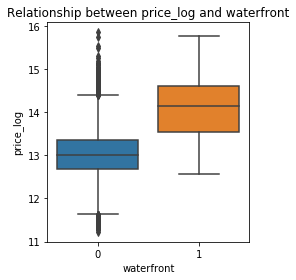

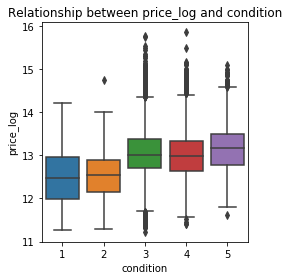

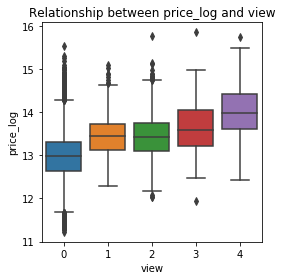

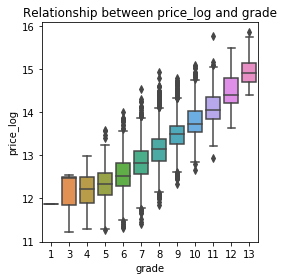

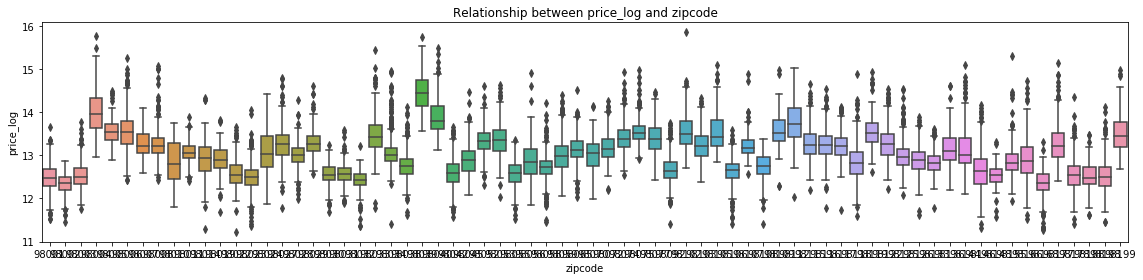

In [8]:
# Examine the relationship between price_log and some categorical variables
plot_categorical('waterfront')
plot_categorical('condition')
plot_categorical('view')
plot_categorical('grade')
plot_categorical('zipcode', 16, 4)

<b>Observation</b>:
<li>Houses with waterfront view, higher condition, higher view, and higher grade generally have higher median price_log</li>
<li>Some zipcodes have higher median price_log than others, to be explored below.</li>

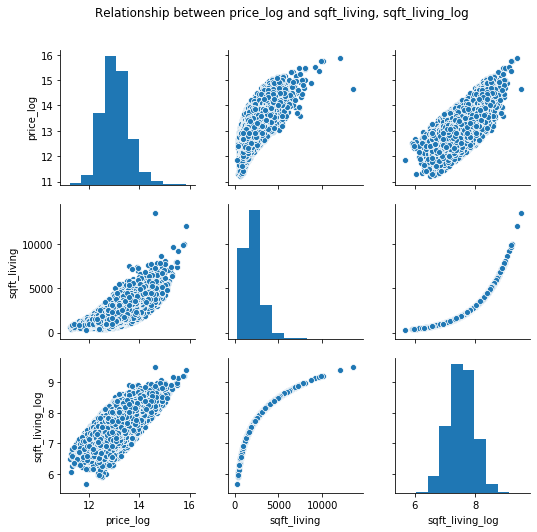

In [9]:
# Relationship between price_log and sqft_living
house['sqft_living_log'] = np.log(house['sqft_living'])
g = sns.pairplot(house[['price_log', 'sqft_living', 'sqft_living_log']])
g.fig.suptitle('Relationship between price_log and sqft_living, sqft_living_log')
plt.subplots_adjust(top=0.9)
plt.show()

<b>Observation</b>:
<li>sqft_living: positively-skewed with a long right tail; a log transform creates a distribution closer to a normal distribution.</li>
<li>sqft_living_log also has a more linear relationship with price_log, compared to before log transform.</li>    


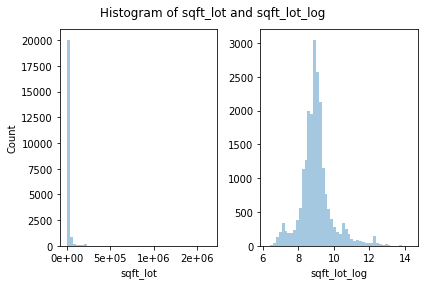

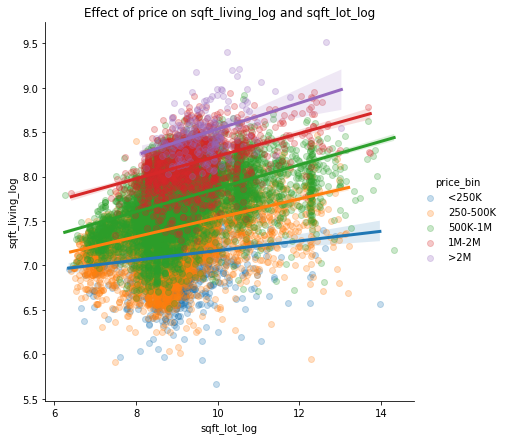

           sqft_living_log  sqft_lot_log  %change_living_log  %change_lot_log
price_bin                                                                    
<250K             7.112407      8.977629            0.000000         0.000000
250-500K          7.417044      8.880635            4.283178        -1.080393
500K-1M           7.743549      9.055902            8.873809         0.871874
1M-2M             8.152767      9.383766           14.627389         4.523879
>2M               8.489317      9.685550           19.359270         7.885394


In [10]:
# Examine the effect of price on the sqft_living and sqft_lot
# bin price to use as a plot aesthetic
house['price_bin'] = pd.cut(house['price'], bins=[0, 250e3, 500e3, 1000e3, 2000e3, np.max(house['price'])], 
       labels=['<250K', '250-500K', '500K-1M', '1M-2M', '>2M'])

# sqft_lot: positively-skewed with a long right tail; 
# a log transform creates a distribution closer to a normal distribution
# log transform also provides consistency with sqft_living_log.

house['sqft_lot_log'] = np.log(house['sqft_lot'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['sqft_lot'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['sqft_lot_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of sqft_lot and sqft_lot_log')
plt.show()

# plot sqft_living_log vs. sqft_lot_log with price_bin
g = sns.lmplot(x='sqft_lot_log', y='sqft_living_log', hue='price_bin', data=house,
               height=6, aspect=1,
               truncate=True, scatter_kws={'alpha':0.25,}, line_kws={'lw':3})
g.set(title=('Effect of price on sqft_living_log and sqft_lot_log'))
plt.show()

# mean sqft_living_log and sqft_lot_log for different price bins
bypricebin = house.groupby('price_bin')[['sqft_living_log', 'sqft_lot_log']].mean()
# percent change in sqft_living_log and sqft_lot_log
bypricebin['%change_living_log'] = (bypricebin['sqft_living_log']/bypricebin.loc['<250K','sqft_living_log']-1)*1e2
bypricebin['%change_lot_log'] = (bypricebin['sqft_lot_log']/bypricebin.loc['<250K','sqft_lot_log']-1)*1e2
print(bypricebin)

<b>Observation</b>:
<li>Higher priced houses have larger mean sqft_living_log and mean sqft_lot_log.</li>
<li>Visually, the horizontal separation between price bins (i.e. difference in sqft_living_log) is more pronounced (compared to the difference in sqft_lot_log). This is confirmed from the percent change between price bins.</li>

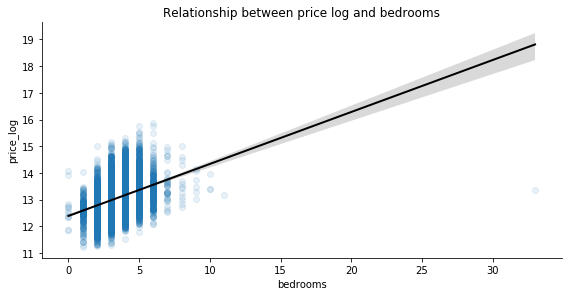

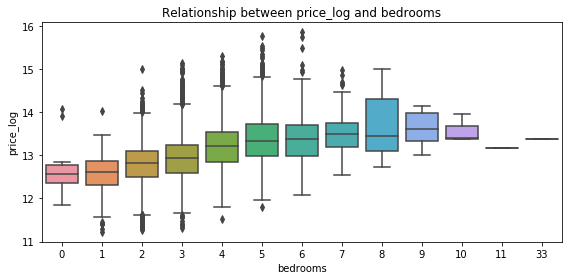

          count       mean
bedrooms                  
0            13  12.683452
1           199  12.563503
2          2760  12.799338
3          9824  12.936713
4          6882  13.222538
5          1601  13.389285
6           272  13.404179
7            38  13.547328
8            13  13.654096
9             6  13.623684
10            3  13.579418
11            1  13.161584
33            1  13.369223

mean+2*std of bedrooms = 5.230965285392136


In [11]:
# Examine the relationship between price_log and bedrooms
plot_numerical('bedrooms')
plot_categorical('bedrooms', 8, 4)
# mean price_log by bedrooms
print(house.groupby('bedrooms')['price_log'].agg(['count', 'mean']))
print('\nmean+2*std of bedrooms =', house['bedrooms'].mean()+2*house['bedrooms'].std())

<b>Observation</b>:
<li>Bedrooms (and bathrooms and in particular floors) could be treated as numerical (because math operations, e.g. addition, are possible), but could also be categorical given the relatively small numbers of discrete values</li>
<li>Most houses have 3 bedrooms.</li>
<li>For bedrooms, there is 1 observation of 33 bedrooms (a potential outlier; greater than mean+2*std)</li>

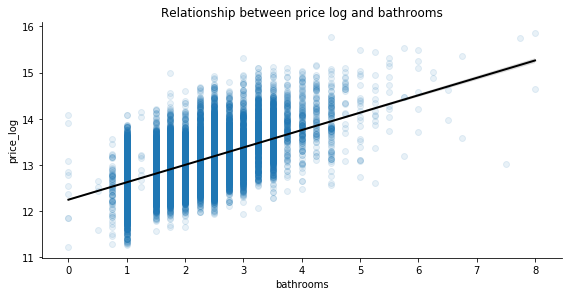

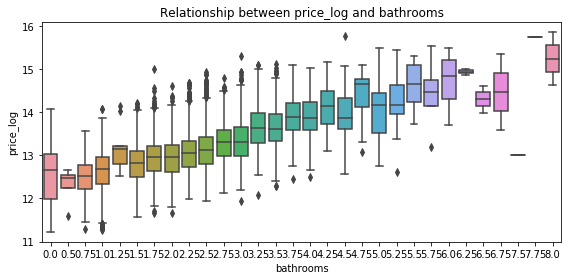

           count       mean
bathrooms                  
0.00          10  12.654618
0.50           4  12.304427
0.75          72  12.488345
1.00        3852  12.663895
1.25           9  13.181757
1.50        1446  12.826194
1.75        3048  12.943894
2.00        1930  12.945215
2.25        2047  13.081219
2.50        5380  13.131441
2.75        1185  13.304738
3.00         753  13.337593
3.25         589  13.642737
3.50         731  13.639175
3.75         155  13.883357
4.00         136  13.915132
4.25          79  14.120288
4.50         100  13.938586
4.75          23  14.401731
5.00          21  14.076461
5.25          13  14.202685
5.50          10  14.617774
5.75           4  14.419566
6.00           6  14.724318
6.25           2  14.942754
6.50           2  14.301258
6.75           2  14.474304
7.50           1  13.017003
7.75           1  15.744856
8.00           2  15.248208


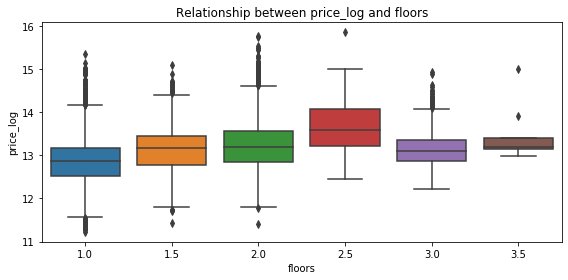

        count       mean
floors                  
1.0     10680  12.875368
1.5      1910  13.111522
2.0      8241  13.235179
2.5       161  13.666089
3.0       613  13.167054
3.5         8  13.471149


In [12]:
# Examine the relationship between price_log and bathrooms, and floors
plot_numerical('bathrooms')
plot_categorical('bathrooms', 8, 4)
# mean price_log by bathrooms
print(house.groupby('bathrooms')['price_log'].agg(['count', 'mean']))

plot_categorical('floors', 8, 4)
# mean price_log by floors
print(house.groupby('floors')['price_log'].agg(['count', 'mean']))

<b>Observation</b>:
<li>Most houses have 2.5 baths. Generally, price_log increases with bathrooms.</li>
<li>Most houses have 1 floor. Generally, price_log increases with floors for 1-2.5 floors.</li>

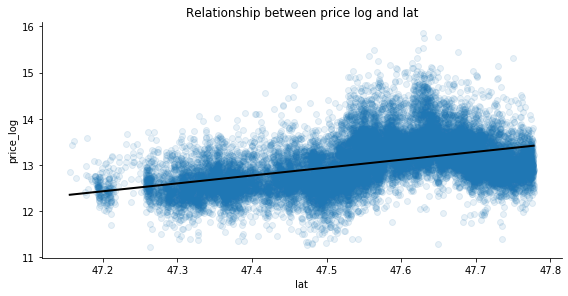

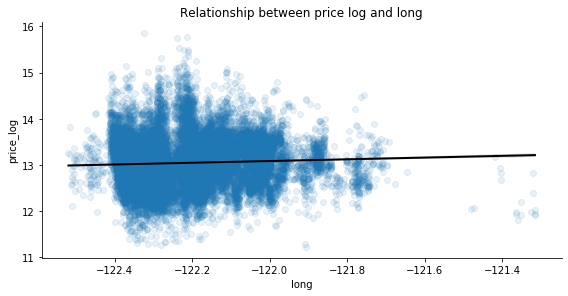

In [13]:
# Examine the relationship between price_log and lat/long
plot_numerical('lat')
plot_numerical('long')

<b>Observation:</b>
<li>Latitute is positively correlated with price_log, from the scatter plot above and the correlation matrix above.</li>

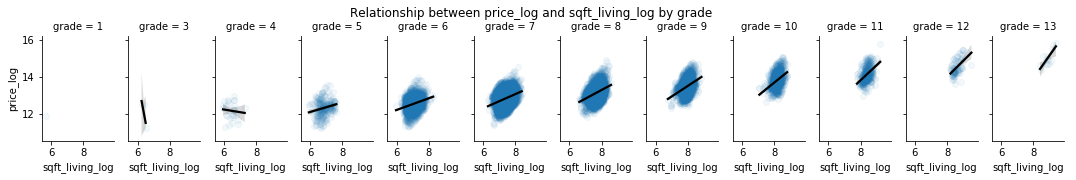

counts by grade: grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64


In [14]:
# Examine multiple variables: price_log vs. sqft_living by grade
g = sns.FacetGrid(house, col='grade', height=2.5, aspect=0.5)
g = g.map(sns.regplot, 'sqft_living_log', 'price_log', truncate=True, scatter_kws={'alpha':0.05}, line_kws={'color':'k'}).add_legend()
g.fig.suptitle('Relationship between price_log and sqft_living_log by grade')
plt.subplots_adjust(top=0.25)
g.fig.tight_layout()
plt.show()

print('counts by grade:', house.groupby('grade')['grade'].count())

<b>Observation</b>:
<li>The positive correlation between price_log and sqft_living_log was observed starting at grade=5 (but grade 1, 3, 4, and 13 have few observations)</li>

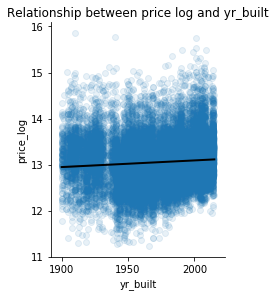

mean yr_built if house has been renovated:  1940.0


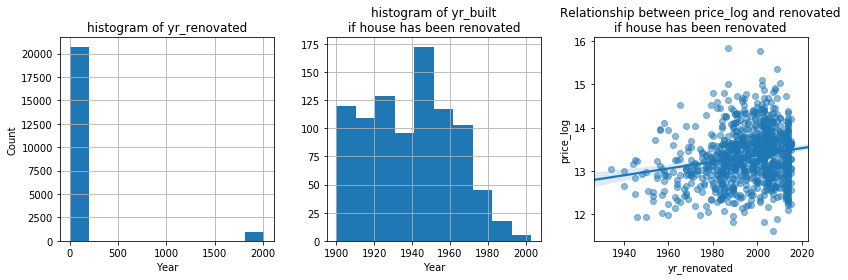

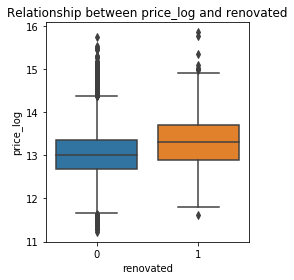

In [15]:
# Examine the relationship between price_log and yr_built
plot_numerical('yr_built', aspect=0.8)

fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize=(12,4))
# most yr_renovated are zero values
house['yr_renovated'].hist(ax=ax)
ax.set_title('histogram of yr_renovated')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
# make new column "renovated", 1 if renovated, 0 if not renovated
conditions = [house['yr_renovated']==0]
choices = [0]
house['renovated'] = np.select(conditions, choices, default=1)
print('mean yr_built if house has been renovated: ', np.round(house[house['renovated']==1]['yr_built'].mean()))
house[house['renovated']==1]['yr_built'].hist(ax=ax1)
ax1.set_title('histogram of yr_built\nif house has been renovated')
ax1.set_xlabel('Year')
g = sns.regplot(x=house[house['renovated']==1]['yr_renovated'], y=house[house['renovated']==1]['price_log'], ax=ax2,
           scatter_kws={'alpha':0.5})
g.set(title='Relationship between price_log and renovated\nif house has been renovated')
fig.tight_layout()
plt.show()
plot_categorical('renovated')

<b>Observation</b>:
<li>1. Weak positive correlation between price_log and yr_built.</li>
<li>2. Most houses have not been renovated; for houses that have been renovated, mean yr_built = 1940. There is also a positive correlation between price_log and yr_renovated for houses that have been renovated.</li>
<li>3. Overall, renovated houses have higher median price_log vs. not renovated.</li>

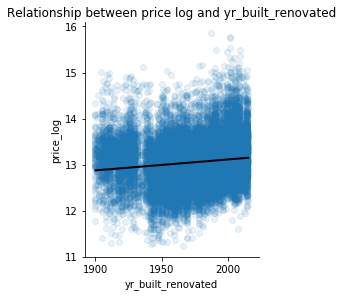

correlation coefficient between yr_built and price_log: 0.08
correlation coefficient between yr_built_renovated and price_log: 0.13


In [16]:
# make new column, the later date of yr_built and yr_renovated
conditions = [house['renovated']==0]
choices = [house['yr_built']]
house['yr_built_renovated'] = np.select(conditions, choices, default=house['yr_renovated'])

plot_numerical('yr_built_renovated', aspect=0.8)

print('correlation coefficient between yr_built and price_log:', np.round(house[['yr_built', 'price_log']].corr().iloc[0,1],2))
print('correlation coefficient between yr_built_renovated and price_log:', np.round(house[['yr_built_renovated', 'price_log']].corr().iloc[0,1],2))

<b>Observation</b>:
<li>yr_built_renovated: yr_renovated for houses that have been renovated, and yr_built for houses that have not been renovated (i.e. the latter of the two).</li>
<li>price_log could be better predicted by yr_built_renovated than yr_built alone.</li>

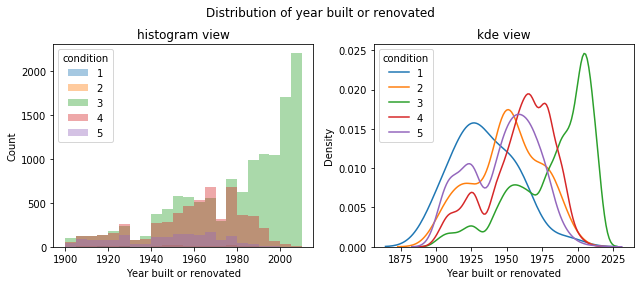

In [17]:
# Examine house condition by year built or renovated (yr_built_renovated)
bins = np.arange(np.min(house['yr_built_renovated']), np.max(house['yr_built_renovated']), 5)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,4))
for xx in np.sort(house['condition'].unique()):
    sns.distplot(house[house['condition']==xx]['yr_built_renovated'], kde=False, bins=bins, ax=ax0, label=xx)
    sns.distplot(house[house['condition']==xx]['yr_built_renovated'], hist=False, bins=bins, ax=ax1, label=xx)
ax0.set_xlabel('Year built or renovated')
ax0.set_ylabel('Count')
ax1.set_xlabel('Year built or renovated')
ax1.set_ylabel('Density')
fig.suptitle('Distribution of year built or renovated')
ax0.legend(title='condition')
ax1.legend(title='condition')
ax0.set_title('histogram view')
ax1.set_title('kde view')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

<b>Observation</b>:
<li>The newest buildings are of medium condition (3), buildings built or renovated before 1980 are of highest condition (5).</li>

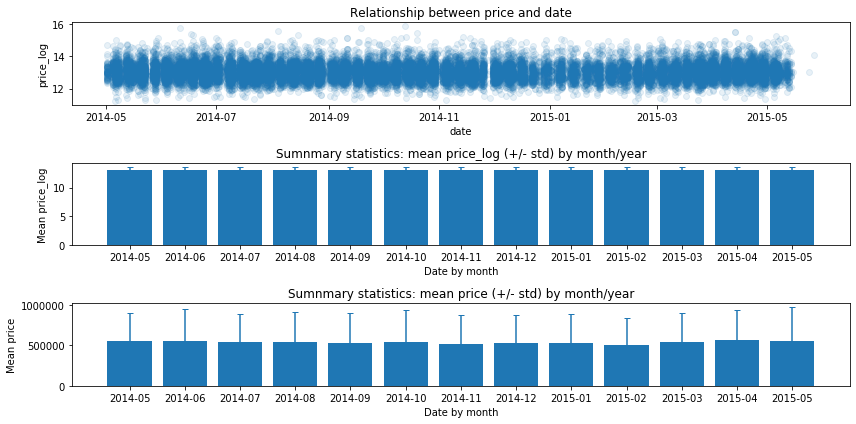

In [18]:
# Examine the relationship between price_log and date
# change date to datetime
house['date'] = pd.to_datetime(house['date'])
# get time period in months to compute summary statistics
house['month-year'] = house['date'].dt.to_period('M')

# workaround for FutureWarning
import pandas.plotting._converter as pandacnv
pandacnv.register()

fig, (ax0, ax1, ax2) = plt.subplots(3,1,figsize=(12,6))
ax0.plot(house['date'], house['price_log'],'o', alpha=0.1)
ax0.set_ylabel('price_log')
ax0.set_xlabel('date')
ax0.set_title('Relationship between price and date')

ax1.bar(x=house.groupby('month-year')['price_log'].mean().index.to_series().astype(str), height=house.groupby('month-year')['price_log'].mean())
ax1.errorbar(x=house.groupby('month-year')['price_log'].mean().index.to_series().astype(str), y=house.groupby('month-year')['price_log'].mean(), yerr=house.groupby('month-year')['price_log'].std(), fmt='none', capsize=3)
ax1.set_title('Sumnmary statistics: mean price_log (+/- std) by month/year')
ax1.set_ylabel('Mean price_log')
ax1.set_xlabel('Date by month')

ax2.bar(x=house.groupby('month-year')['price'].mean().index.to_series().astype(str), height=house.groupby('month-year')['price'].mean())
ax2.errorbar(x=house.groupby('month-year')['price'].mean().index.to_series().astype(str), y=house.groupby('month-year')['price'].mean(), yerr=house.groupby('month-year')['price'].std(), fmt='none', capsize=3)
ax2.set_title('Sumnmary statistics: mean price (+/- std) by month/year')
ax2.set_ylabel('Mean price')
ax2.set_xlabel('Date by month')
fig.tight_layout()
plt.show()

<b>Observation</b>: 
<li>Over ~1 year, there does not appear to be a strong price trend based on date.</li>
<li>Note: price was plotted in addition to price_log for a more intuitive interpretation.</li>

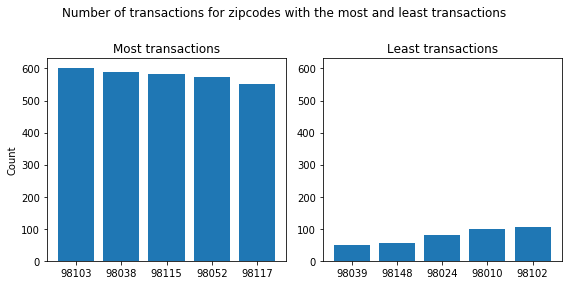

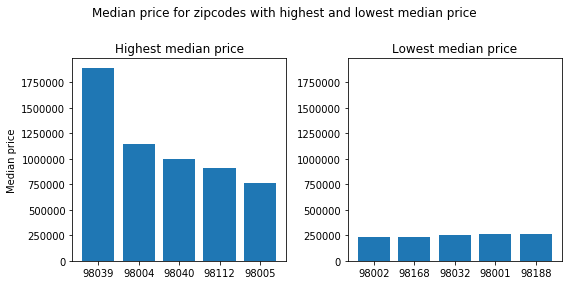

In [19]:
# Examine summary statistics by zipcode
price_by_zip = house.groupby('zipcode')['price'].agg(['count','mean','std','median'])

# Analyze zipcodes with the most/least transactions and the highest/lowest median price

# zipcodes with the most and least transactions
price_by_zip.sort_values(by=['count'], ascending=False).head()
most_transactions = price_by_zip.sort_values(by=['count'], ascending=False).head().index.values
least_transactions = price_by_zip.sort_values(by=['count'], ascending=True).head().index.values
transactions_list = np.append(most_transactions, least_transactions)

# plot # of transactions in zipcodes with the most and least transactions
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].bar(x=most_transactions.astype(str), height=price_by_zip.sort_values(by=['count'], ascending=False).head()['count'].values)
axs[1].bar(x=least_transactions.astype(str), height=price_by_zip.sort_values(by=['count'], ascending=True).head()['count'].values)
axs[0].set_title('Most transactions')
axs[1].set_title('Least transactions')
for ax in axs:
    ax.set_ylim(0, np.max([axs[0].get_ylim()[1], axs[1].get_ylim()[1]]))
axs[0].set_ylabel('Count')
fig.tight_layout()
plt.subplots_adjust(top=0.8)
fig.suptitle('Number of transactions for zipcodes with the most and least transactions')
plt.show()

# zipcodes with the highest and lowest median price
price_by_zip.sort_values(by=['median'], ascending=False).head()
highest_med = price_by_zip.sort_values(by=['median'], ascending=False).head().index.values
lowest_med = price_by_zip.sort_values(by=['median'], ascending=True).head().index.values
med_price_list = np.append(highest_med, lowest_med)

# plot median price in zipcodes with the highest and lowest median price
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].bar(x=highest_med.astype(str), height=price_by_zip.sort_values(by=['median'], ascending=False).head()['median'].values)
axs[1].bar(x=lowest_med.astype(str), height=price_by_zip.sort_values(by=['median'], ascending=True).head()['median'].values)
axs[0].set_title('Highest median price')
axs[1].set_title('Lowest median price')
for ax in axs:
    ax.set_ylim(0, np.max([axs[0].get_ylim()[1], axs[1].get_ylim()[1]]))
axs[0].set_ylabel('Median price')
fig.tight_layout()
plt.subplots_adjust(top=0.8)
fig.suptitle('Median price for zipcodes with highest and lowest median price')
plt.show()

<b>Observation</b>:
<li>This analysis focuses on zipcodes with the most/least transactions (i.e. number of observations/rows) and the highest/lowest median price. There is a large difference in terms of number of transactions and median price between the highest and lowest zipcodes.</li>
<li>Note: plotting price instead of price_log for more intuitive interpretation.</li>
<li>Highest median price found in: Medina, WA 98039, Bellevue, WA 98004, Mercer Island, WA 98040.</li>
<li>Most transactions recorded in 98103.</li>

[Back to Section 1 summary](#Section1summary)<p>
[Back to Table of Contents](#Contents)

In [20]:
# clear defined variables before running the next section
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Section 2 / Milestone 2: Hypothesis Simulation<a name="Section2"></a>

##### Instructions
For Milestone 2 you should

1. explore the dataset supported by charts and summary statistics;
2. identify a likely distribution for several of the features;
3. compute basic summary statistics by both classical, bootstrap, and Bayesian methods;
4. compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods; and
5. leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant.

### Solution for Section 2:
For this part of the project, several features in the dataset were explored and hypothesis testing was performed. Selected features for exploration: price (treated as a feature for this exercise), sqft_living, sqft_above, yr_built, and long.


### Summary of findings for Section 2:<a name="Section2summary"></a>
<ul>
    <li>
Likely distributions were tested for the following: price, sqft_living, sqft_above, yr_built, long, using Kolmogorov-Smirnov test</li>
    <li>A likely distribution for sqft_living is inverse guassian distribution. While likely distributions for other variables were not found, several were ruled out</li>
    <li>Mean, standard deviation, 95% confidence interval of the mean were computed for the above variables, using classical, bootstrap, and Bayesian methods</li>
    <li>Hypothesis tests were performed to determine if the differences in pairs and multiple populations are significant</li>
       <ul>
           <li>1: Determine whether multiple populations of <b>price</b> conditioned by <b>view</b> are significant by ANOVA and Tukey's HSD<br><b>Result:</b> From Tukey's HSD test, all pairs, except for view=1 and view=2, are statistically different at the 95% confidence level.</li><p>
           <li>2: Determine whether multiple populations of <b>sqft_living</b> conditioned by <b>grade</b> are significant by ANOVA and Tukey's HSD<br><b>Result:</b> From Tukey's HSD test, all pairs are statistically different at the 95% confidence level.</li><p>
           <li>3: Determine whether difference in pairs of <b>price</b> conditioned by <b>waterfront</b> are significant by <b>Bootstrapping</b><br><b>Result:</b> The distribution of the difference in means does not cover zero. We can infer that the means of the two populations are significantly different.</li><p>
           <li>4: Determine whether difference in pairs of <b>price</b> conditioned by <b>waterfront</b> are significant by <b>Bayesian method</b><br><b>Result:</b> Reject null hypothesis that the 2 samples were drawn from the same population distribution as the 95% credible intervals do not overlap.</li><p>
           <li>5: Determine whether difference in pairs of <b>sqft_living</b> conditioned by <b>zipcode</b> are significant by <b>Bootstrapping</b><br><b>Result:</b> The distribution of the difference in means does not cover zero. We can infer that the means of the two populations are significantly different.</li><p>
           <li>6: Determine whether difference in pairs of <b>sqft_living</b> conditioned by <b>zipcode</b> are significant by Bayesian method<br><b>Result:</b> Reject null hypothesis that the 2 samples were drawn from the same population distribution as the 95% credible intervals do not overlap.</li>
    </ul>
    </ul>

In [21]:
# Load necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import scipy.stats as ss
from sklearn.preprocessing import scale
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.weightstats as ws

# Load data
url = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
house = pd.read_csv(url)

### 1. explore the dataset supported by charts and summary statistics 
Milestone 1 was dedicated to exploratory data analysis; multiple chart types and aesthetics, as well as summary statistics, were used to visually explore different aspects of the dataset.<p>
Here, the dataset was explored in the context of hypothesis testing, and charts and summary statistics were used throughout the subsequent sections.

##### Determine whether variables are numeric or categorical

In [22]:
# Determine whether variables are numeric or categorical
print('data type:')
print(house.dtypes)
print('\n')
print('unique levels:')
print(house.nunique())

data type:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


unique levels:
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               

##### Observations:
<ul>
<li>waterfront, view, condition, grade are categorical because they have a small number of discrete numeric values and are qualitative.</li>
<li>zipcode is fundamentally categorical.</li>
    <li>bedrooms (and bathrooms and in particular floors) could be treated as numerical (because math operations, e.g. addition, are possible), but could also be categorical given the relatively small numbers of discrete values</li>
</ul>

##### Summary statistics

In [23]:
# Overview of summary statistics including mean, standard deviation, and quartiles
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### Plot histograms of several variables

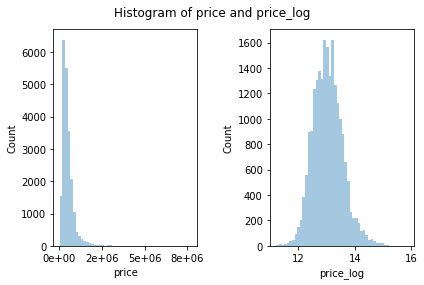

In [24]:
# price is positively-skewed with a long right tail; 
# a log transform may create a distribution closer to a normal distribution.
house['price_log'] = np.log(house['price'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['price'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['price_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of price and price_log')
plt.show()

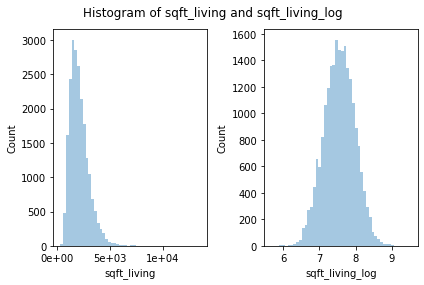

In [25]:
# sqft_living is positively-skewed with a long right tail; 
# a log transform may create a distribution closer to a normal distribution.
house['sqft_living_log'] = np.log(house['sqft_living'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['sqft_living'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['sqft_living_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of sqft_living and sqft_living_log')
plt.show()

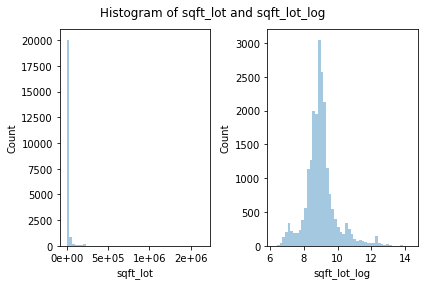

In [26]:
# sqft_lot is positively-skewed with a long right tail; 
# try a log transform to see how the distribution changes (still does not look close to normal)
house['sqft_lot_log'] = np.log(house['sqft_lot'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['sqft_lot'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['sqft_lot_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of sqft_lot and sqft_lot_log')
plt.show()

### 2. identify a likely distribution for several of the features
Features tested: price (treated as a feature for this exercise), sqft_living, sqft_above, yr_built, long<br>
Method: Kolmogorov-Smirnov test

In [27]:
# plot cumulative distribution function (CDF) of the sample and the CDF of the theoretical distribution to test
def plot_cums(dist1, dist2, label1, label2):
    # sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red', label=label1)
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green', label=label2)
    plt.title('Cumulative distribution functions\n of {} and {}'.format(label1, label2))
    plt.ylabel('Cumulative probability')
    plt.xlabel('Sample (scaled)')
    plt.legend()
    plt.show()
    
# plot feature histogram
def plot_col(col):
    house[col].hist()
    plt.title('Histogram of {}'.format(col))
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    plt.grid(b=None)
    plt.show()

In [28]:
# standardize samples before applying the K-S test  
price_s = scale(house['price'])
price_log_s = scale(house['price_log'])
sqft_living_s = scale(house['sqft_living'])
sqft_living_log_s = scale(house['sqft_living_log'])
sqft_above_s = scale(house['sqft_above'])
yr_built_s = scale(house['yr_built'])
long_s = scale(house['long'])

##### Identify a likely distribution for price

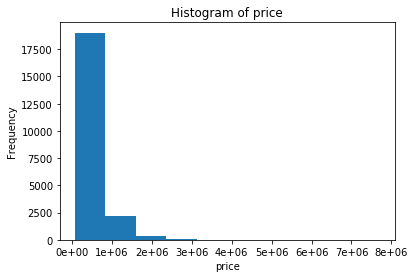

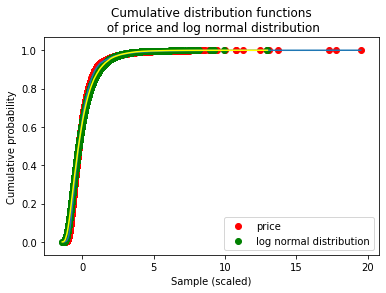

KS-statistic = 0.016111415335924306
P-value = 2.6793301170431634e-05


In [29]:
# test price against lognormal distribution
# plot feature histogram
plot_col('price')

# fit sample to test dist
args = ss.lognorm.fit(price_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.lognorm.rvs(args[0], args[1], args[2], size = len(price_s), random_state=123)),
          'price', 'log normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=price_s, cdf='lognorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

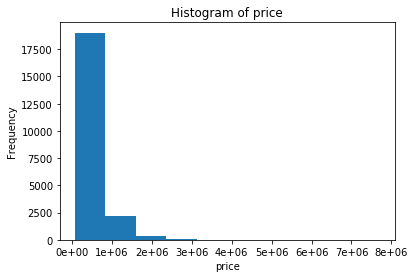

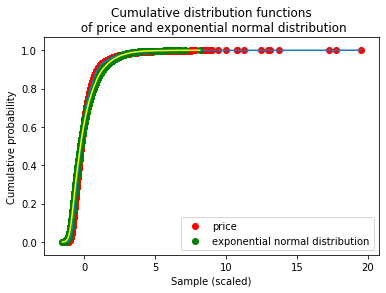

KS-statistic = 0.027461658773721975
P-value = 1.3920340456587736e-14


In [30]:
# test price against exponnorm distribution
# plot feature histogram
plot_col('price')

# fit sample to test dist
args = ss.exponnorm.fit(price_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.exponnorm.rvs(args[0], args[1], args[2], size = len(price_s), random_state=123)),
          'price', 'exponential normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=price_s, cdf='exponnorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

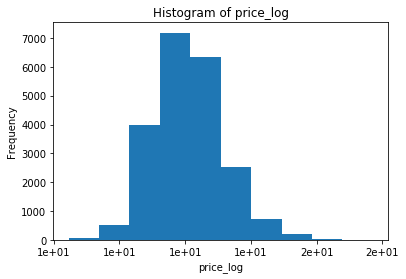

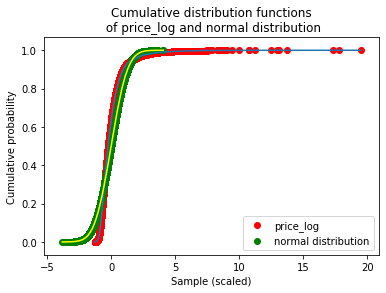

KS-statistic = 0.025988070503969174
P-value = 4.1903563851070804e-13


In [31]:
# test price_log against norm distribution
# plot feature histogram
plot_col('price_log')

# fit sample to test dist
args = ss.norm.fit(price_log_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.norm.rvs(args[0], args[1], size = len(price_log_s), random_state=123)),
          'price_log', 'normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=price_log_s, cdf='norm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

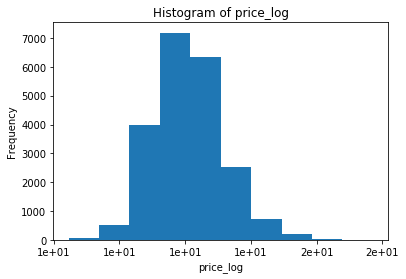

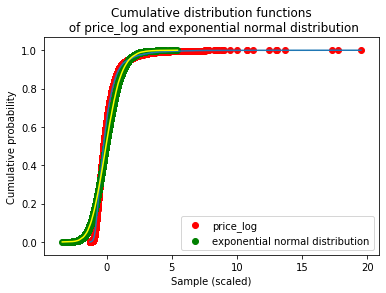

KS-statistic = 0.012802990324212504
P-value = 0.0016743837425996005


In [32]:
# test price_log against exponnorm distribution
# plot feature histogram
plot_col('price_log')

# fit sample to test dist
args = ss.exponnorm.fit(price_log_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.exponnorm.rvs(args[0], args[1], args[2], size = len(price_log_s), random_state=123)),
          'price_log', 'exponential normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=price_log_s, cdf='exponnorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

<b>Conclusion</b>: while a likely distribution was not found, these results suggest that the distribution of price is not lognormal and not exponential normal. Furthermore, the distribution of price_log is not normal and not exponential normal. 

##### Identify a likely distribution for sqft_living

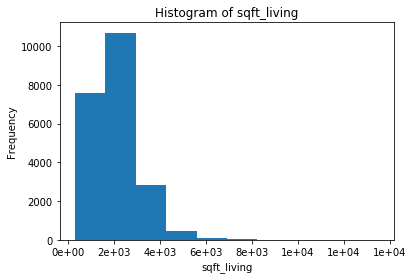

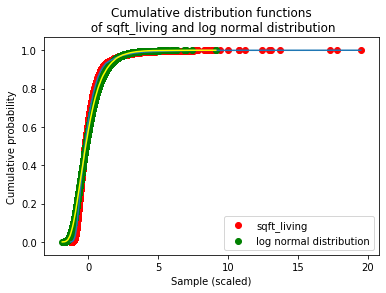

KS-statistic = 0.010117589848217201
P-value = 0.023951818843576785


In [33]:
# test sqft_living against lognorm distribution
# plot feature histogram
plot_col('sqft_living')

# fit sample to test dist
args = ss.lognorm.fit(sqft_living_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.lognorm.rvs(args[0], args[1], args[2], size = len(sqft_living_s), random_state=123)),
          'sqft_living', 'log normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=sqft_living_s, cdf='lognorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

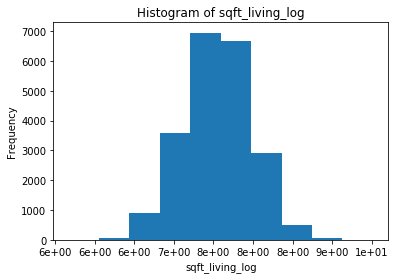

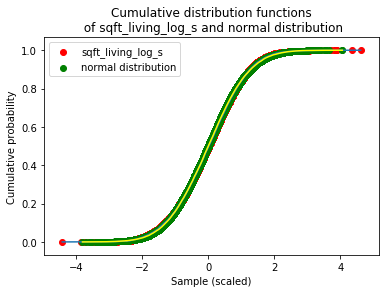

KS-statistic = 0.011441260048272617
P-value = 0.006976266675346063


In [34]:
# test sqft_living_log against norm distribution
# plot feature histogram
plot_col('sqft_living_log')

# fit sample to test dist
args = ss.norm.fit(sqft_living_log_s) 

# graphically compare CDFs
plot_cums(sqft_living_log_s, scale(ss.norm.rvs(args[0], args[1], size = len(sqft_living_log_s), random_state=123)),
          'sqft_living_log_s', 'normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=sqft_living_log_s, cdf='norm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

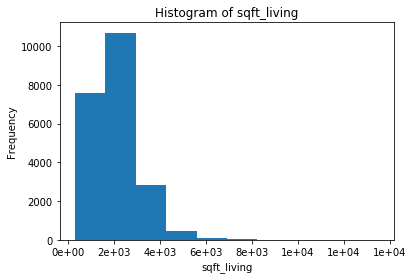

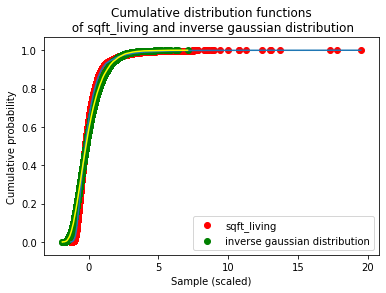

KS-statistic = 0.008226061646173344
P-value = 0.10731055793089662


In [35]:
# test sqft_living against invgauss distribution
# plot feature histogram
plot_col('sqft_living')

# fit sample to test dist
args = ss.invgauss.fit(sqft_living_s) 

# graphically compare CDFs
plot_cums(price_s, scale(ss.invgauss.rvs(args[0], args[1], args[2], size = len(sqft_living_s), random_state=123)),
          'sqft_living', 'inverse gaussian distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=sqft_living_s, cdf='invgauss', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

<b>Conclusion:</b> these results suggest that the distribution of sqft_living is not log normal (although it looked close, p=0.02) and not normal. <br>
A likely distribution for sqft_living is inverse guassian distribution. 

##### Identify a likely distribution for sqft_above

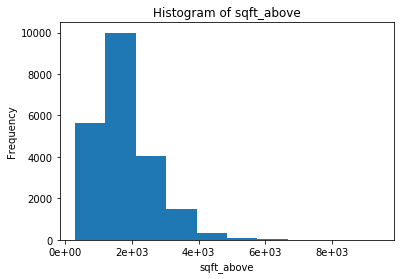

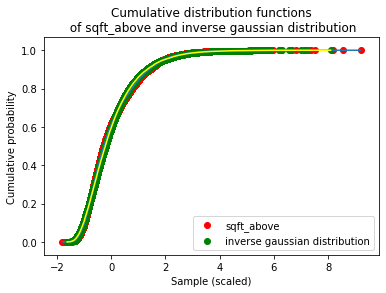

KS-statistic = 0.028867438812603452
P-value = 4.540459844944879e-16


In [36]:
# sqft_above = sqft_living - sqft_basement
# test sqft_living against invgauss distribution (a likely distribution for sqft_living as tested above)
# plot feature histogram
plot_col('sqft_above')

# fit sample to test dist
args = ss.invgauss.fit(sqft_above_s) 

# graphically compare CDFs
plot_cums(sqft_above_s, scale(ss.invgauss.rvs(args[0], args[1], args[2], size = len(sqft_above_s), random_state=123)),
          'sqft_above', 'inverse gaussian distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=sqft_above_s, cdf='invgauss', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

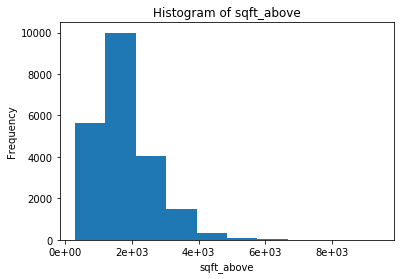

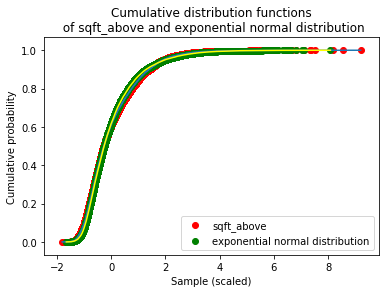

KS-statistic = 0.021585656616913584
P-value = 3.5810851544354597e-09


In [37]:
# test sqft_living against exponnorm distribution 
# plot feature histogram
plot_col('sqft_above')

# fit sample to test dist
args = ss.exponnorm.fit(sqft_above_s) 

# graphically compare CDFs
plot_cums(sqft_above_s, scale(ss.exponnorm.rvs(args[0], args[1], args[2], size = len(sqft_above_s), random_state=123)),
          'sqft_above', 'exponential normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=sqft_above_s, cdf='exponnorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

<b>Conclusion</b>: while a likely distribution was not found, these results suggest that distribution of sqft_above is not inverse guassian and not exponential normal.

##### Identify a likely distribution for yr_built

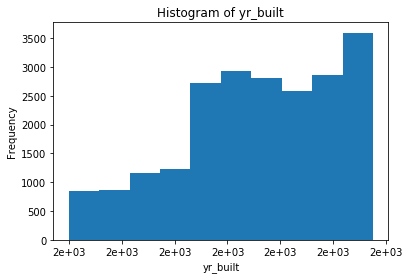

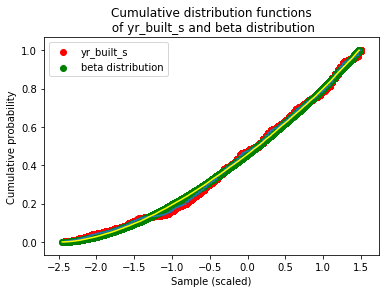

KS-statistic = 0.04185104463242098
P-value = 2.631849208374021e-33


In [38]:
# test yr_built against beta distribution 
# plot feature histogram
plot_col('yr_built')

# fit sample to test dist
args = ss.beta.fit(yr_built_s) 

# graphically compare CDFs
plot_cums(yr_built_s, scale(ss.beta.rvs(args[0], args[1], args[2], args[3], size = len(yr_built_s), random_state=123)),
          'yr_built_s', 'beta distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=yr_built_s, cdf='beta', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

<b>Conclusion</b>: while a likely distribution was not found, these results suggest that distribution of yr_built is not beta.

##### Identify a likely distribution for long

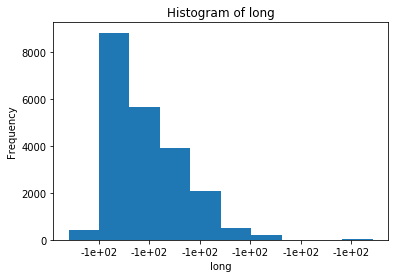

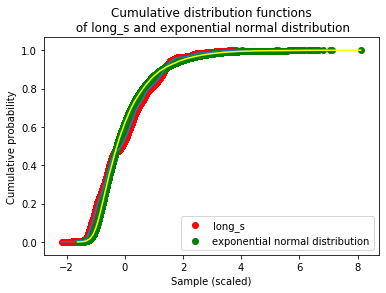

KS-statistic = 0.09003893861101087
P-value = 1.28717115045224e-152


In [39]:
# test long against exponnorm distribution 
# plot feature histogram
plot_col('long')

# fit sample to test dist
args = ss.exponnorm.fit(long_s) 

# graphically compare CDFs
plot_cums(long_s, scale(ss.exponnorm.rvs(args[0], args[1], args[2], size = len(long_s), random_state=123)),
          'long_s', 'exponential normal distribution')

# formal test
ks_statisic, pvalue = ss.kstest(rvs=long_s, cdf='exponnorm', args=args)
print('KS-statistic = ' + str(ks_statisic))
print('P-value = ' + str(pvalue))

<b>Conclusion</b>: while a likely distribution was not found, these results suggest that distribution of long is not exponential normal.

### 3. compute basic summary statistics by both classical, bootstrap, and Bayesian methods;
### 4. compute confidence intervals for the above summary statistics by classical, bootstrap, and Bayesian methods;

##### Classical method

In [40]:
# quick look at summary statistics
cols = ['price', 'sqft_living', 'sqft_above', 'yr_built', 'long']
house[cols].describe()

,price,sqft_living,sqft_above,yr_built,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,1788.390691,1971.005136,-122.213896
std,3.671272e+05,918.440897,828.090978,29.373411,0.140828
min,7.500000e+04,290.000000,290.000000,1900.000000,-122.519000
25%,3.219500e+05,1427.000000,1190.000000,1951.000000,-122.328000
50%,4.500000e+05,1910.000000,1560.000000,1975.000000,-122.230000
75%,6.450000e+05,2550.000000,2210.000000,1997.000000,-122.125000
max,7.700000e+06,13540.000000,9410.000000,2015.000000,-121.315000


In [41]:
# 95% confidence interval
# Assuming the data is being considered a population, and with sample size > 20000, use z-score
price_classical_ci = ws.DescrStatsW(house['price']).zconfint_mean(alpha=0.05, alternative='two-sided')
sqft_living_classical_ci = ws.DescrStatsW(house['sqft_living']).zconfint_mean(alpha=0.05, alternative='two-sided')
sqft_above_classical_ci = ws.DescrStatsW(house['sqft_above']).zconfint_mean(alpha=0.05, alternative='two-sided')
yr_built_classical_ci = ws.DescrStatsW(house['yr_built']).zconfint_mean(alpha=0.05, alternative='two-sided')
long_classical_ci = ws.DescrStatsW(house['long']).zconfint_mean(alpha=0.05, alternative='two-sided')

In [42]:
# display dataframe (mean, standard deviation, 95% confidence interval for mean)
pd.DataFrame({'mean':np.mean(house[cols]), 'standard deviation':np.std(house[cols]),
             '95% conf int for mean':[price_classical_ci, sqft_living_classical_ci, sqft_above_classical_ci,
                                     yr_built_classical_ci, long_classical_ci]})

,mean,standard deviation,95% conf int for mean
price,540088.141767,367118.703181,"(535193.6554108728, 544982.628122186)"
sqft_living,2079.899736,918.419649,"(2067.655215890687, 2092.1442566489877)"
sqft_above,1788.390691,828.071820,"(1777.3507023855923, 1799.430679190311)"
yr_built,1971.005136,29.372731,"(1970.6135337597807, 1971.396737836018)"
long,-122.213896,0.140825,"(-122.21577390790743, -122.21201890197555)"


##### Bootstrap method: bootstrap the means using 1000 bootstrap samples
(since the CLT only applies to sample means and not medians or any other statistic)

In [43]:
# function to bootstrap the means using 1000 bootstrap samples
def bootstrap_mean(col, n_replicas=1000):
    return pd.Series([house[col].sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

# bootstrap the means
price_bootstrap_means = bootstrap_mean('price')
sqft_living_bootstrap_means = bootstrap_mean('sqft_living')
sqft_above_bootstrap_means = bootstrap_mean('sqft_above')
yr_built_bootstrap_means = bootstrap_mean('yr_built')
long_bootstrap_means = bootstrap_mean('long')

# display dataframe (mean, standard error, and 95% confidence interval for mean)
pd.DataFrame({'mean':[np.mean(price_bootstrap_means), np.mean(sqft_living_bootstrap_means), np.mean(sqft_above_bootstrap_means), 
                      np.mean(yr_built_bootstrap_means), np.mean(long_bootstrap_means)],
 'standard error':[np.std(price_bootstrap_means), np.std(sqft_living_bootstrap_means), np.std(sqft_above_bootstrap_means), 
                   np.std(yr_built_bootstrap_means), np.std(long_bootstrap_means)],
              '95% conf int for mean': [(np.percentile(np.sort(price_bootstrap_means), 5/2), np.percentile(np.sort(price_bootstrap_means), 100-5/2)),
                                        (np.percentile(np.sort(sqft_living_bootstrap_means), 5/2), np.percentile(np.sort(sqft_living_bootstrap_means), 100-5/2)),
                                        (np.percentile(np.sort(sqft_above_bootstrap_means), 5/2), np.percentile(np.sort(sqft_above_bootstrap_means), 100-5/2)),
                                        (np.percentile(np.sort(yr_built_bootstrap_means), 5/2), np.percentile(np.sort(yr_built_bootstrap_means), 100-5/2)),
                                        (np.percentile(np.sort(long_bootstrap_means), 5/2), np.percentile(np.sort(long_bootstrap_means), 100-5/2))
                                       ]},
             index=['price', 'sqft_living', 'sqft_above', 'yr_built', 'long'])

,mean,standard error,95% conf int for mean
price,540090.507118,2465.661463,"(535351.0860604729, 544988.9587192893)"
sqft_living,2080.251575,6.289886,"(2067.4918648498588, 2092.1655531393144)"
sqft_above,1788.358342,5.497140,"(1777.7769745060843, 1799.214766575672)"
yr_built,1970.991982,0.204785,"(1970.6006708925186, 1971.4210509878314)"
long,-122.213895,0.000966,"(-122.215837601212, -122.21202664600044)"


##### Bayesian method

In [44]:
# Bayesian confidence intervals for the mean, var, and std using bayes_mvs
price_bayesian_ci = ss.bayes_mvs(house['price'], alpha=0.95)
sqft_living_bayesian_ci = ss.bayes_mvs(house['sqft_living'], alpha=0.95)
sqft_above_bayesian_ci = ss.bayes_mvs(house['sqft_above'], alpha=0.95)
yr_built_bayesian_ci = ss.bayes_mvs(house['yr_built'], alpha=0.95)
long_bayesian_ci = ss.bayes_mvs(house['long'], alpha=0.95)

In [45]:
# display dataframe (mean, standard deviation, 95% Bayesian conf int/credible interval for mean)
pd.DataFrame({'mean':[price_bayesian_ci[0][0], sqft_living_bayesian_ci[0][0], sqft_above_bayesian_ci[0][0], 
                      yr_built_bayesian_ci[0][0], long_bayesian_ci[0][0]],
             'standard deviation':[price_bayesian_ci[2][0], sqft_living_bayesian_ci[2][0], sqft_above_bayesian_ci[2][0], 
                                   yr_built_bayesian_ci[2][0], long_bayesian_ci[2][0]],
             '95% Bayesian conf int/credible interval for mean':[price_bayesian_ci[0][1], sqft_living_bayesian_ci[0][1], sqft_above_bayesian_ci[0][1], 
                                                                 yr_built_bayesian_ci[0][1], long_bayesian_ci[0][1]]},
            index=['price', 'sqft_living', 'sqft_above', 'yr_built', 'long'])

,mean,standard deviation,95% Bayesian conf int/credible interval for mean
price,540088.141767,367118.703181,"(535193.76864233, 544982.5148907289)"
sqft_living,2079.899736,918.419649,"(2067.6554991614507, 2092.143973378224)"
sqft_above,1788.390691,828.071820,"(1777.3509577901198, 1799.4304237857834)"
yr_built,1971.005136,29.372731,"(1970.6135428192952, 1971.3967287765036)"
long,-122.213896,0.140825,"(-122.21577386447234, -122.21201894541059)"


### 5.  leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant

In [46]:
# plot boxplot to graphically explore the differences 
# between column 1 conditioned by column 2, plot groups with >= 100 observations
def make_boxplot(col1, col2, nobs=100, figsz=(6,4)):
    import seaborn as sns
    print('breakdown:')
    print(house[col2].value_counts())

    subset = house[col2].value_counts()[house[col2].value_counts()>=nobs].index
    house_plot = house[house[col2].isin(subset)]

    fig, ax = plt.subplots()
    sns.boxplot(x=col2, y=col1, data=house_plot, ax=ax)
    plt.title('{} conditioned by {}'.format(col1, col2))
    plt.show()

##### Hypothesis test 1


Determine whether multiple populations of <b>price</b> conditioned by <b>view</b> are significant by ANOVA and Tukey's HSD<br>
Here, to make sure there is sufficient data for each category, symboling categories with less than 100 observations were dropped.

breakdown:
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


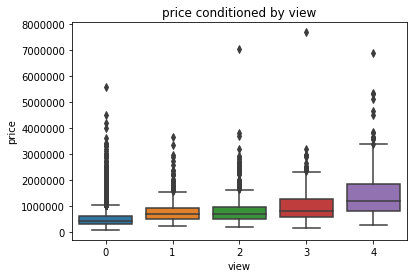

F statistic = 1092.688222523648
P-value = 0.0


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower       upper     reject
----------------------------------------------------------------
     0      1 315716.6452  0.001 265158.0005    366275.29   True
     0      2 295836.6957  0.001 265681.8971  325991.4944   True
     0      3 475401.0824  0.001  434425.915  516376.2498   True
     0      4 967147.0461  0.001 915585.4139 1018708.6784   True
     1      2 -19879.9495 0.8759 -78016.4869   38256.5879  False
     1      3 159684.4372  0.001  95267.7511  224101.1232   True
     1      4 651430.4009  0.001 579812.3374  723048.4643   True
     2      3 179564.3867  0.001  129537.946  229590.8273   True
     2      4 671310.3504  0.001 612299.4841  730321.2167   True
     3      4 491745.9637  0.001 426539.1021  556952.8254   True
----------------------------------------------------------------


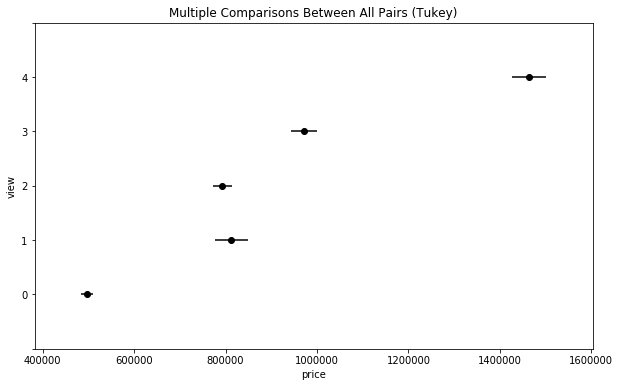

In [47]:
# plot price conditioned by view
make_boxplot('price', 'view')

# get groups of price conditioned by view
v0 = house.groupby('view').get_group(0)['price']
v1 = house.groupby('view').get_group(1)['price']
v2 = house.groupby('view').get_group(2)['price']
v3 = house.groupby('view').get_group(3)['price']
v4 = house.groupby('view').get_group(4)['price']

# ANOVA
f_statistic, p_value = ss.f_oneway(v0, v1, v2, v3, v4)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((v0, v1, v2, v3, v4)).flatten(),
                   'group_num': ['0']*len(v0)+['1']*len(v1)+['2']*len(v2)+
                   ['3']*len(v3)+['4']*len(v4)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

g = Tukey_HSD.plot_simultaneous();
g.gca().set_xlabel('price');
g.gca().set_ylabel('view');

<b>Results:</b>
<br>
From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.
<p>
From Tukey's HSD test, all pairs, except for view=1 and view=2, are statistically different at the 95% confidence level.

##### Hypothesis test 2


Determine whether multiple populations of <b>sqft_living</b> conditioned by <b>grade</b> are significant by ANOVA and Tukey's HSD<br>
Here, to make sure there is sufficient data for each category, symboling categories with less than 100 observations were dropped.

breakdown:
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


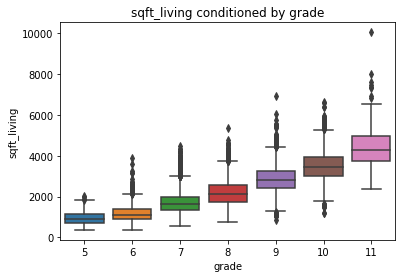

F statistic = 4807.009556796127
P-value = 0.0


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    10     11   875.1488 0.001   776.9218   973.3758   True
    10      5 -2536.9734 0.001 -2656.4679 -2417.4789   True
    10      6 -2328.7385 0.001 -2391.2573 -2266.2197   True
    10      7 -1830.8994 0.001 -1884.0817 -1777.7171   True
    10      8 -1335.5513 0.001  -1390.146 -1280.9567   True
    10      9  -652.1599 0.001  -712.1622  -592.1575   True
    11      5 -3412.1222 0.001 -3549.6174 -3274.6269   True
    11      6 -3203.8873 0.001 -3296.2703 -3111.5043   True
    11      7 -2706.0482 0.001 -2792.3869 -2619.7095   True
    11      8 -2210.7001 0.001 -2297.9159 -2123.4843   True
    11      9 -1527.3087 0.001 -1618.0076 -1436.6097   True
     5      6   208.2349 0.001     93.496   322.9737   True
     5      7    706.074 0.001   596.1433   816.0046

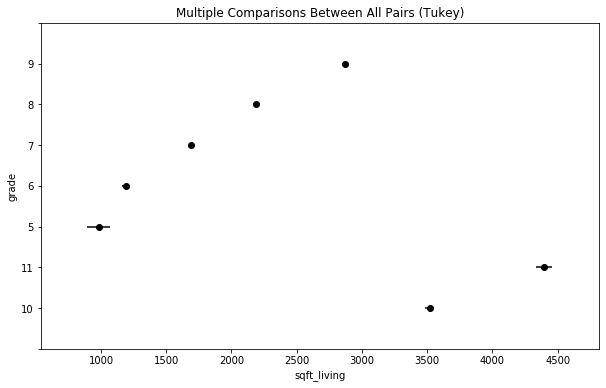

In [48]:
# plot sqft_living conditioned by grade
make_boxplot('sqft_living', 'grade')

# get groups of sqft_living conditioned by grade
g5 = house.groupby('grade').get_group(5)['sqft_living']
g6 = house.groupby('grade').get_group(6)['sqft_living']
g7 = house.groupby('grade').get_group(7)['sqft_living']
g8 = house.groupby('grade').get_group(8)['sqft_living']
g9 = house.groupby('grade').get_group(9)['sqft_living']
g10 = house.groupby('grade').get_group(10)['sqft_living']
g11 = house.groupby('grade').get_group(11)['sqft_living']

# ANOVA
f_statistic, p_value = ss.f_oneway(g5, g6, g7, g8, g9, g10, g11)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((g5, g6, g7, g8, g9, g10, g11)).flatten(),
                   'group_num': ['5']*len(g5)+['6']*len(g6)+['7']*len(g7)+
                   ['8']*len(g8)+['9']*len(g9)+['10']*len(g10)+['11']*len(g11)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

g = Tukey_HSD.plot_simultaneous();
g.gca().set_xlabel('sqft_living');
g.gca().set_ylabel('grade');

<b>Results:</b>
<br>
From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.
<p>
From Tukey's HSD test, all pairs are statistically different at the 95% confidence level.

##### Hypothesis test 3
Determine whether difference in pairs of <b>price</b> conditioned by <b>waterfront</b> are significant by <b>Bootstrapping</b>

Group 1: waterfront = 0<br>
Group 2: waterfront = 1<br>
<b>Hypothesis test</b>: Does the confidence interval of the diffrence in means cover zero? Significantly different if (lower CI>0) or (upper CI<0), in which case we reject the null hypothesis that the two samples were drawn from the same population distribution.<br>

breakdown:
0    21450
1      163
Name: waterfront, dtype: int64


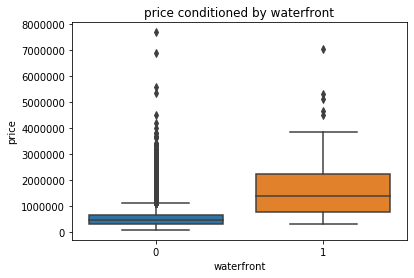

In [49]:
# boxplot of price conditioned by waterfront
make_boxplot('price', 'waterfront')

In [50]:
# bootstrap price for waterfront = 0 and waterfront = 1 groups
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    sample = house.sample(frac=1.0, replace=True)
    w0_sample_mean = sample[sample['waterfront'] == 0]['price'].mean()
    w1_sample_mean = sample[sample['waterfront'] == 1]['price'].mean()
    diffs.append(w0_sample_mean - w1_sample_mean)
diffs = pd.Series(diffs)

In [51]:
# Plot the distribution and mark the mean, 95% confidence interval
def plot_hist(x, p=5):
    plt.hist(x, alpha=0.5)
    plt.axvline(x.mean(), label='mean difference in means')
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3, label='95% CI')
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)

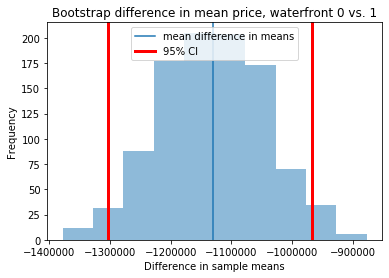

In [52]:
# plot difference in mean + 95% confidence interval
plot_hist(diffs)
plt.title('Bootstrap difference in mean price, waterfront 0 vs. 1')
plt.ylabel('Frequency')
plt.xlabel('Difference in sample means')
plt.legend()
plt.show()

<b>Result</b>: The distribution of the difference in means does not cover zero. We can infer that the means of the two populations are significantly different.

##### Hypothesis test 4
Determine whether difference in pairs of <b>price</b> conditioned by <b>waterfront</b> are significant by <b>Bayesian method</b>

Group 1: waterfront = 0<br>
Group 2: waterfront = 1<br>
<b>Hypothesis test</b>: Reject null hypothesis that the 2 samples were drawn from the same population distribution if the 95% credible intervals do not overlap.

In [53]:
# Bayesian confidence intervals for the mean, var, and std using bayes_mvs
# for waterfront = 0 and waterfront = 1 groups
w0 = house.groupby('waterfront').get_group(0)['price']
w1 = house.groupby('waterfront').get_group(1)['price']

w0_bayesian_ci = ss.bayes_mvs(w0, alpha=0.95)
w1_bayesian_ci = ss.bayes_mvs(w1, alpha=0.95)

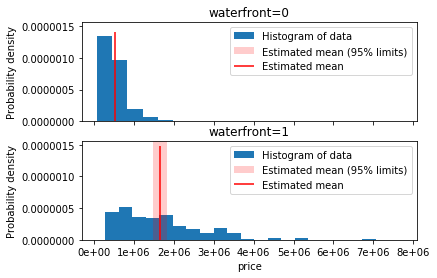

In [54]:
# Plot means and credible intervals
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(6,4))
axs[0].hist(w0, bins=20, density=True, label='Histogram of data')
axs[0].vlines(w0_bayesian_ci[0].statistic, axs[0].get_ylim()[0], axs[0].get_ylim()[1], colors='r', label='Estimated mean')
axs[0].axvspan(w0_bayesian_ci[0].minmax[0], w0_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[0].legend()
axs[0].set_title('waterfront=0')
axs[0].set_ylabel('Probability density')
axs[1].hist(w1, bins=20, density=True, label='Histogram of data')
axs[1].vlines(w1_bayesian_ci[0].statistic, axs[1].get_ylim()[0], axs[1].get_ylim()[1], colors='r', label='Estimated mean')
axs[1].axvspan(w1_bayesian_ci[0].minmax[0], w1_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[1].legend()
axs[1].set_title('waterfront=1')
axs[1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
axs[1].set_ylabel('Probability density')
axs[1].set_xlabel('price')
plt.show()

<b>Results:</b> Reject null hypothesis that the 2 samples were drawn from the same population distribution as the 95% credible intervals do not overlap.

##### Hypothesis test 5
Determine whether difference in pairs of <b>sqft_living</b> conditioned by <b>zipcode</b> are significant by <b>Bootstrapping</b>


Specifically, from EDA in Milestone 1, the 2 zipcodes with the highest median house prices were Medina, WA 98039 and Bellevue, WA 98004. Are there differences in sqft_living in these 2 zipcodes?

Group 1: zipcode 98039<br>
Group 2: zipcode 98004<br>
<b>Hypothesis test</b>: Does the confidence interval of the diffrence in means cover zero? Significantly different if (lower CI>0) or (upper CI<0), in which case we reject the null hypothesis that the two samples were drawn from the same population distribution.<br>

In [55]:
# bootstrap sqft_living for zipcode = 98039 and zipcode = 98004 groups
# make sure the original sample is of sufficent size
print('# observations for zipcode 98039: '+str(house.groupby('zipcode').get_group(98039)['sqft_living'].count()))
print('# observations for zipcode 98004: '+str(house.groupby('zipcode').get_group(98004)['sqft_living'].count()))

n_replicas = 1000
diffs = []
for i in range(n_replicas):
    sample = house.sample(frac=1.0, replace=True)
    z1_sample_mean = sample[sample['zipcode'] == 98039]['sqft_living'].mean()
    z2_sample_mean = sample[sample['zipcode'] == 98004]['sqft_living'].mean()
    diffs.append(z1_sample_mean - z2_sample_mean)
diffs = pd.Series(diffs)

# observations for zipcode 98039: 50
# observations for zipcode 98004: 317


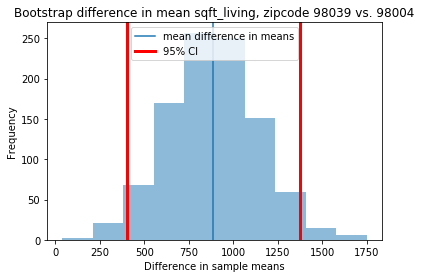

In [56]:
# plot difference in mean + 95% confidence interval
plot_hist(diffs)
plt.title('Bootstrap difference in mean sqft_living, zipcode 98039 vs. 98004')
plt.ylabel('Frequency')
plt.xlabel('Difference in sample means')
plt.legend()
plt.show()

<b>Result</b>: The distribution of the difference in means does not cover zero. We can infer that the means of the two populations are significantly different.

##### Hypothesis test 6
Determine whether difference in pairs of <b>sqft_living</b> conditioned by <b>zipcode</b> are significant by <b>Bayesian method</b>

Group 1: zipcode 98039<br>
Group 2: zipcode 98004<br>
<b>Hypothesis test</b>: Reject null hypothesis that the 2 samples were drawn from the same population distribution if the 95% credible intervals do not overlap.

In [57]:
# Bayesian confidence intervals for the mean, var, and std using bayes_mvs
# for zipcode = 98039 and zipcode = 98004 groups
z1 = house.groupby('zipcode').get_group(98039)['sqft_living']
z2 = house.groupby('zipcode').get_group(98004)['sqft_living']

z1_bayesian_ci = ss.bayes_mvs(z1, alpha=0.95)
z2_bayesian_ci = ss.bayes_mvs(z2, alpha=0.95)

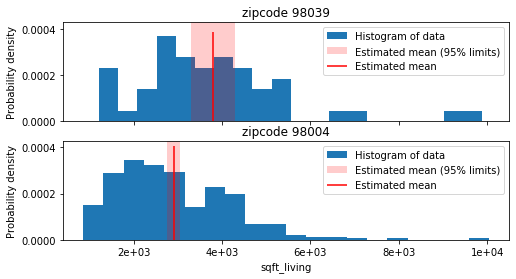

In [58]:
# Plot means and credible intervals
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(8,4))
axs[0].hist(z1, bins=20, density=True, label='Histogram of data')
axs[0].vlines(z1_bayesian_ci[0].statistic, axs[0].get_ylim()[0], axs[0].get_ylim()[1], colors='r', label='Estimated mean')
axs[0].axvspan(z1_bayesian_ci[0].minmax[0], z1_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[0].legend()
axs[0].set_title('zipcode 98039')
axs[0].set_ylabel('Probability density')
axs[1].hist(z2, bins=20, density=True, label='Histogram of data')
axs[1].vlines(z2_bayesian_ci[0].statistic, axs[1].get_ylim()[0], axs[1].get_ylim()[1], colors='r', label='Estimated mean')
axs[1].axvspan(z2_bayesian_ci[0].minmax[0], z2_bayesian_ci[0].minmax[1], facecolor='r', 
           alpha=0.2, label=r'Estimated mean (95% limits)')
axs[1].legend()
axs[1].set_title('zipcode 98004')
axs[1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
axs[1].set_ylabel('Probability density')
axs[1].set_xlabel('sqft_living')
plt.show()

<b>Results:</b> Reject null hypothesis that the 2 samples were drawn from the same population distribution as the 95% credible intervals do not overlap.

[Back to Section 2 summary](#Section2summary)<p>
[Back to Table of Contents](#Contents)

In [59]:
# clear defined variables before running the next section
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Section 3 / Milestone 3 & 4: Modeling<a name="Section3"></a>

##### Instructions
For Milestone 3 you should

1. prepare the data via cleaning, normalization, encoding, et cetera; and
2. generate and evaluate a working model (linear, or time series).


For Milestone 4 you should
<ul>
<li>enhance your model results by trying different model and/or data enhancement techniques (Build 3 models with different enhancements and feature engineering techniques);</li>
    <li>explain your choice of model and model accuracy</li>

### Solution for Section 3:
The data was prepared for modeling, an initial model was built and refined, and different model and data enhancements were tested.

### Summary of findings for Section 3:<a name="Section3summary"></a>
<ul>
    <li>The data was prepared, including feature engineering (based on EDA from Milestone 1), normalization, and encoding</li>
    <li>4 models were constructed and evaluated</li>
    <ul><li>1. <b>linear regression</b></li>
        <li>2. <b>regularized linear regression/elastic net</b></li>
        <li>3. <b>support vector regression SVR (with linear and rbf kernels)</b></li>
        <li>4. <b>XGBoost model</b></li>
    </ul>
    <li>Overall, all 4 models tested here provided comparable adjusted R2 (ranging from 0.86 to 0.88)</li>
    <li>Some models, such as SVR and XGBoost, could be futher tuned to improve performance. However, given the comparable performances of models of different types, other steps in model building, such as additional iterations of feature engineering, may provide larger model improvements</li> 
    <li>On the test set, the SVR (rbf kernel) and xgboost were the most accurate. However, for better interpretability one may prefer the linear regression/elastic net models which provide feature coefficients (or the SVR model with linear kernel, which also provides the feature weights).</li>

    
    
<p><p> 
<b>Back to the use case</b>: a developer interested in acquiring properties in King County, Washington is interested in what home features (zip code, structure, etc) would yield a high price.


<li>Most important features included:
    <ul>
        <li><b>Zipcode</b>
            <ul>
            <li>Zipcodes 98004, 98039, 98112, 98040 consistenlty had the largest coefficients in the Elastic net and the SVR (linear kernel) models</li>
            <li>In the XGBoost model, the feature importance of zipcode was behind spatial features lat and long and size features sqft_living_log and sqft_lot_log, but among the zipcode features, 98004, 98039, 98112, 98040 remained the most important</li>
            <li>Note that these same zipcodes had the highest median price found in exploratory data analysis in Section 1</li>
            </ul></li>
        <li><b>Lat, sqft_living_log, view, sqft_lot_log</b> were consistently important non-zipcode features in the Elastic net, SVR (linear kernel), and XGBoost models</li>
        
</ul>    



Overall, model results presented here provide a framework to estimate house prices in King County, and quantitative insights into most important home features that determine the sale price. Using these data, the developer could assess with confidence whehter properties are offered at a fair price and thus make informed purchasing decisions. The models in this study could also be scaled to include and facilitate comparisons between multiple housing markets.

In [60]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as ss
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import xgboost as xgb

# import warnings filter
from warnings import simplefilter
# suppress future warnings
simplefilter(action='ignore', category=FutureWarning)

# Load and view data
url = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
house_orig = pd.read_csv(url)
house_orig.head()

# make a copy of the dataframe
house = house_orig.copy()

##### Data preparation

In [61]:
# all columns except date are of int/float type 
# find number of NANs/missing values
print('data types:')
print(house.dtypes)
print('\nnumber of nan values: {}'.format(house.isna().sum().sum()))

data types:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

number of nan values: 0


In [62]:
# drop id, since it appears to be independent of price 
# it is a "key", with with almost as many unique values as observations
print('unique values for id: {}'.format(house['id'].nunique()))
cols_to_drop = ['id']

unique values for id: 21436


In [63]:
# date may be useful as a feature, even though the data only spans 1 year
# change date to ordinal 
house['date'] = pd.to_datetime(house['date'])
house['date_ordinal']=house['date'].map(dt.datetime.toordinal)
cols_to_drop.append('date')

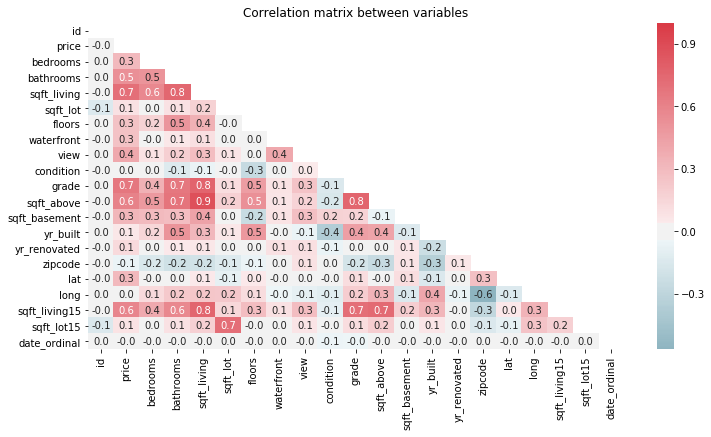

In [64]:
# Examine correlation between variables.
corrmat = house.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True) # diverging colormap
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
sns.heatmap(corrmat, mask=mask, annot=True, cmap=cmap, fmt='.1f', center=0, ax=ax)
ax.set_title('Correlation matrix between variables')
plt.show()

In [65]:
# find pairs with highest correlations (corr coeff>0.6)
corrmat = house.corr().abs()
np.fill_diagonal(corrmat.values, np.nan)
corr_series = corrmat.unstack()
corr_series_ordered = corr_series.sort_values(ascending=False)
print('pairs with the highest correlation:\n(variable 1, variable 2, correlation coeff)')
corr_series_ordered[corr_series_ordered>0.6][::2]

pairs with the highest correlation:
(variable 1, variable 2, correlation coeff)


sqft_above     sqft_living    0.876597
grade          sqft_living    0.762704
sqft_living15  sqft_living    0.756420
grade          sqft_above     0.755923
bathrooms      sqft_living    0.754665
sqft_living15  sqft_above     0.731870
sqft_lot       sqft_lot15     0.718557
sqft_living15  grade          0.713202
price          sqft_living    0.702035
sqft_above     bathrooms      0.685342
price          grade          0.667434
bathrooms      grade          0.664983
sqft_above     price          0.605567
dtype: float64

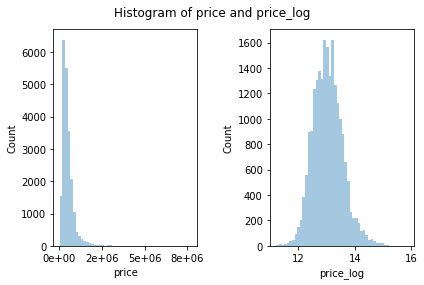

In [66]:
# price is positively-skewed with a long right tail; 
# a log transform creates a distribution closer to a normal distribution.
house['price_log'] = np.log(house['price'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['price'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['price_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of price and price_log')
plt.show()

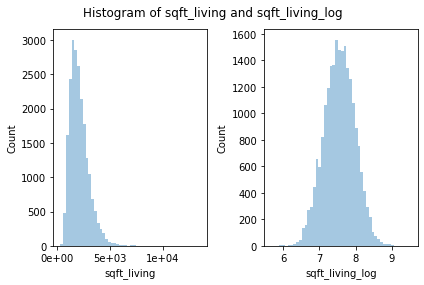

In [67]:
# sqft_living is positively-skewed with a long right tail; 
# a log transform creates a distribution closer to a normal distribution.
# Also, from Milestone 1, sqft_living_log also has a more linear relationship with price_log, compared to before log transform.
house['sqft_living_log'] = np.log(house['sqft_living'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['sqft_living'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['sqft_living_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of sqft_living and sqft_living_log')
plt.show()

cols_to_drop.append('sqft_living')

##### Updated feature engineering 1: transform sqft_lot<a name="sqft_lot"></a>
Applying this transformation to the baseline linear regression improves model adjusted R2 from 0.861 to 0.866. The change was incorporated.

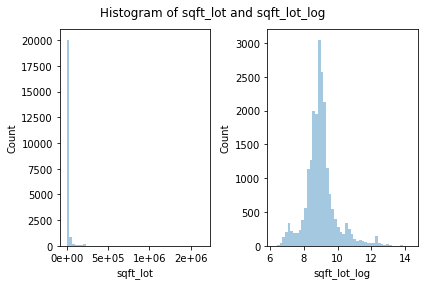

In [68]:
# Similar to sqft_living, sqft_lot is positively-skewed with a long right tail; 
# a log transform creates a distribution closer to a normal distribution.
house['sqft_lot_log'] = np.log(house['sqft_lot'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['sqft_lot'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['sqft_lot_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of sqft_lot and sqft_lot_log')
plt.show()

cols_to_drop.append('sqft_lot')

In [69]:
# sqft_living15, sqft_lot15 are colinear to other features of similar names (sqft_living, sqft_lot, respectively). 
# Differences between these similar named variables are unclear.
# drop sqft_living15, sqft_lot15
cols_to_drop.extend(['sqft_living15', 'sqft_lot15'])

In [70]:
# view, condition, grade are categorical because they have a small number of discrete numeric values and are qualitative.
# function to convert ordinal variables to category type
def custom_ordinal_encoder(col):
    cat_dtype = pd.api.types.CategoricalDtype(categories=sorted(house[col].unique()), ordered=True)
    return house[col].astype(cat_dtype)

# convert ordinal variables to category type
house['view_cat'] = custom_ordinal_encoder('view')
house['condition_cat'] = custom_ordinal_encoder('condition')
#house['grade_cat'] = custom_ordinal_encoder('grade')

# as shown above, grade is highly correlated with a number of variables (some of which also will not be selected for modeling):
# sqft_living, sqft_above, sqft_living15, bathrooms 
# exclude grade, which reduces the condition number of the model.
# when the condition number is large, there could be strong multicollinearity or other numerical problems.

cols_to_drop.extend(['view', 'condition', 'grade'])

In [71]:
# sqft_living = sqft_above + sqft_basement; there are many zeros in sqft_basement, so sqft_above dominates sqft_living.
# exclude sqft_above, keep just sqft_living_log
cols_to_drop.append('sqft_above')

##### Updated feature engineering 2:  create new binary feature basement<a name="sqft_basement"></a>
Note: this change does not improve the RMSE or adjusted R2 of the linear regression model over the original feature sqft_basement, so the change was not incorporated.

In [72]:
# there are many zeros in sqft_basement; create new binary feature to indicate if house has basement or not
if False:
    house['basement'] = house['sqft_basement'].apply(lambda yr: 0 if yr == 0 else 1)
    cols_to_drop.append('sqft_basement')

In [73]:
# create new feature for house age from yr_built
house['years_old'] = house['date'].dt.year - house['yr_built']

# there are many zeros in yr_renovated; create new binary feature renovated to indicate if house has been renovated or not
house['renovated'] = house['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

cols_to_drop.extend(['yr_renovated', 'yr_built'])

In [74]:
# one hot encode the categorical column zipcode (no order in zipcodes)
house = pd.get_dummies(house, prefix='zip', columns=['zipcode'], drop_first=True)

In [75]:
# drop designated columns
house.drop(cols_to_drop, axis=1, inplace=True)

In [76]:
# define function that replaces outliers with the median 
# outliers defined as x > mean(x)+n*std(x) or x < mean(x)-n*std(x), where n could be defined in the function
# function was not used here because model metrics including RMSE and R2 become worse
if False:
    def replace_outlier(y, nstd):
            x = np.copy(y)
            LimitHi = np.mean(x) + nstd*np.std(x)
            LimitLo = np.mean(x) - nstd*np.std(x)
            # Create Flags for outliers 
            FlagBad = (x < LimitLo) | (x > LimitHi)
            # Replace outliers with the median
            x = x.astype(float) # since np.median returns float
            x[FlagBad] = np.median(x)
            return x
        
    # perform replacement on numeric columns
    # num_cols = ['bedrooms', 'bathrooms', 'sqft_living_log', 'sqft_lot', 'floors', 'sqft_basement', 'lat', 'long', 'date_ordinal', 'years_old']    
    num_cols = ['bedrooms', 'bathrooms', 'sqft_living_log', 'sqft_lot_log', 'floors', 'sqft_basement', 'lat', 'long', 'date_ordinal', 'years_old']    
    house[num_cols] = house[num_cols].apply(replace_outlier, nstd=5)

    # check replacement (for example on bedrooms):
    nstd = 5
    check1 = sum(house['bedrooms']==np.median(house['bedrooms']))
    check2 = sum(house_orig['bedrooms']==np.median(house_orig['bedrooms']))+sum(house_orig['bedrooms']>np.mean(house_orig['bedrooms'])+nstd*np.std(house_orig['bedrooms']))+sum(house_orig['bedrooms']<np.mean(house_orig['bedrooms'])-nstd*np.std(house_orig['bedrooms']))
    print(check1==check2)

##### Train/test split

In [77]:
# train/test split
# target
y = house['price_log']
# features
X = house.loc[:, ~house.columns.isin(['price', 'price_log'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('features: {}'.format(X.columns.values))

features: ['bedrooms' 'bathrooms' 'floors' 'waterfront' 'sqft_basement' 'lat' 'long'
 'date_ordinal' 'sqft_living_log' 'sqft_lot_log' 'view_cat'
 'condition_cat' 'years_old' 'renovated' 'zip_98002' 'zip_98003'
 'zip_98004' 'zip_98005' 'zip_98006' 'zip_98007' 'zip_98008' 'zip_98010'
 'zip_98011' 'zip_98014' 'zip_98019' 'zip_98022' 'zip_98023' 'zip_98024'
 'zip_98027' 'zip_98028' 'zip_98029' 'zip_98030' 'zip_98031' 'zip_98032'
 'zip_98033' 'zip_98034' 'zip_98038' 'zip_98039' 'zip_98040' 'zip_98042'
 'zip_98045' 'zip_98052' 'zip_98053' 'zip_98055' 'zip_98056' 'zip_98058'
 'zip_98059' 'zip_98065' 'zip_98070' 'zip_98072' 'zip_98074' 'zip_98075'
 'zip_98077' 'zip_98092' 'zip_98102' 'zip_98103' 'zip_98105' 'zip_98106'
 'zip_98107' 'zip_98108' 'zip_98109' 'zip_98112' 'zip_98115' 'zip_98116'
 'zip_98117' 'zip_98118' 'zip_98119' 'zip_98122' 'zip_98125' 'zip_98126'
 'zip_98133' 'zip_98136' 'zip_98144' 'zip_98146' 'zip_98148' 'zip_98155'
 'zip_98166' 'zip_98168' 'zip_98177' 'zip_98178' 'zip_98188'

In [78]:
# standardize numeric columns (z-score)
#num_cols = ['bedrooms', 'bathrooms', 'sqft_living_log', 'sqft_lot', 'floors', 'sqft_basement', 'lat', 'long', 'date_ordinal', 'years_old']
num_cols = ['bedrooms', 'bathrooms', 'sqft_living_log', 'sqft_lot_log', 'floors', 'sqft_basement', 'lat', 'long', 'date_ordinal', 'years_old']
scaler = StandardScaler().fit(X_train[num_cols])
X_train = X_train.copy()
X_test = X_test.copy()
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

##### Model 1: Linear regression model<a name="model1"></a>

In [79]:
# Baseline linear regression model 
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# predicted price_log 
y_pred_test_lr = regressor.predict(X_test)
y_pred_train_lr = regressor.predict(X_train)

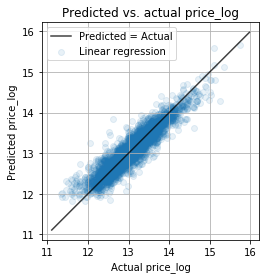

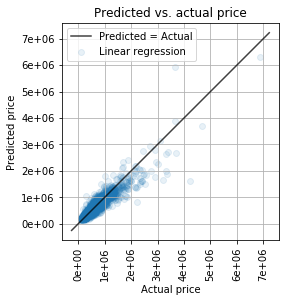

In [80]:
# predicted vs. observed plot
# price_log
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test_lr, label='Linear regression', alpha=0.1)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=10, label='Predicted = Actual')
ax.set_xlabel('Actual price_log')
ax.set_ylabel('Predicted price_log')
ax.set_title('Predicted vs. actual price_log')
ax.set_aspect('equal')
ax.legend()
ax.grid()
plt.show()

# price
fig, ax = plt.subplots()
ax.scatter(np.exp(y_test), np.exp(y_pred_test_lr), label='Linear regression', alpha=0.1)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=10, label='Predicted = Actual')
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.set_xlabel('Actual price')
ax.set_ylabel('Predicted price')
ax.set_title('Predicted vs. actual price')
ax.set_aspect('equal')
ax.legend()
ax.grid()
ax.set_xticks(np.arange(0, ax.get_xlim()[1], 1e6))
ax.set_yticks(np.arange(0, ax.get_ylim()[1], 1e6))
plt.xticks(rotation=90)
plt.show()

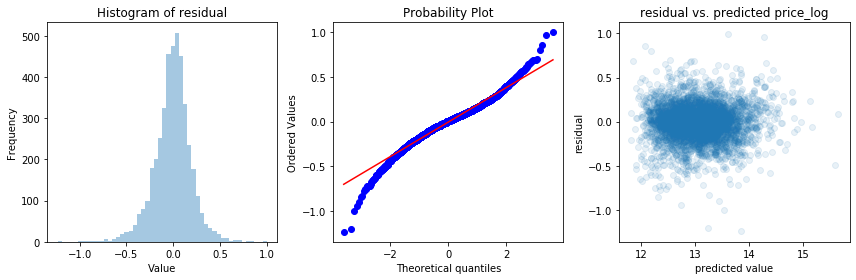

In [81]:
# residual diagnostic plots
fig, axs = plt.subplots(1,3, figsize=(12,4))
sns.distplot((y_test-y_pred_test_lr), kde=False,bins=50, ax=axs[0]);
axs[0].set_title('Histogram of residual')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Value')
ss.probplot((y_test-y_pred_test_lr), plot=axs[1])
axs[2].scatter(y_pred_test_lr, (y_test-y_pred_test_lr), alpha=0.1)
axs[2].set_ylabel('residual')
axs[2].set_xlabel('predicted value')
axs[2].set_title('residual vs. predicted price_log')
fig.tight_layout()
plt.show()

# compute RMSE, R2, adjusted R2 for test set
RMSE_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
ntest = X_test.shape[0]
ptest = X_test.shape[1]
R2_test_lr = r2_score(y_test, y_pred_test_lr)
adjR2_test_lr = 1-(1-R2_test_lr)*(ntest-1)/(ntest-ptest-1)

# store parameter coefficients in dataframe
coeff_lr = pd.DataFrame(regressor.coef_,X.columns,columns=['sklearn'])

In [82]:
# 10-fold cross validation on train set (metric=RMSE)
cv_scores_lr = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
cv_scores_lr_m = np.sqrt(-cv_scores_lr.mean())

# compute R2, adjusted R2 for train set
R2_train_lr = r2_score(y_train, y_pred_train_lr)
ntrain = X_train.shape[0]
ptrain = X_train.shape[1]
adjR2_train_lr = 1-(1-R2_train_lr)*(ntrain-1)/(ntrain-ptrain-1)

In [83]:
# model stats
print('RMSE train (mean cross-validated): {}'.format(cv_scores_lr_m))
print('RMSE test:{}'.format(RMSE_test_lr))

print('\nAdj R2 train: {}'.format(adjR2_train_lr))
print('Adj R2 test: {}'.format(adjR2_test_lr))

RMSE train (mean cross-validated): 0.19310478237221596
RMSE test:0.19623768718966403

Adj R2 train: 0.8658437187218315
Adj R2 test: 0.8615948016873051


In [84]:
# use statsmodels to get p-values of coefficients
# construct statsmodels model
X_train2 = sm.add_constant(X_train)
X_train2 = X_train2.as_matrix()
X_train2 = np.array(X_train2, dtype=float)

sm_model = sm.OLS(y_train, X_train2)
sm_result = sm_model.fit()
print(sm_result.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1345.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:59:41   Log-Likelihood:                 4009.0
No. Observations:               17290   AIC:                            -7850.
Df Residuals:                   17206   BIC:                            -7198.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4439      0.026    481.816      0.0

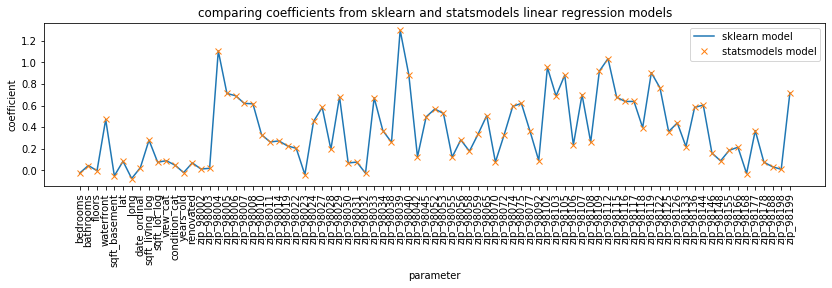

In [85]:
# graphically verify that coefficients are the same 
# between sklearn and statsmodels linear regression models
coeff_lr['sm'] = sm_result.params[1:].values

fig, ax = plt.subplots(figsize=(14,3))
ax.plot(coeff_lr['sklearn'], label='sklearn model')
ax.plot(coeff_lr['sm'],'x', label='statsmodels model')
ax.set_ylabel('coefficient')
ax.set_xlabel('parameter')
plt.xticks(rotation=90)
ax.legend()
plt.title('comparing coefficients from sklearn and statsmodels linear regression models')
plt.show()

In [86]:
# find parameter coefficients that are not significant
coeff_lr['pval'] =sm_result.pvalues[1:].values
print('parameter coefficients with p>0.05:\n{}'.format(coeff_lr[coeff_lr['pval']>0.05].index.to_list()))

parameter coefficients with p>0.05:
['floors', 'zip_98002', 'zip_98003', 'zip_98032', 'zip_98168', 'zip_98188', 'zip_98198']


#### Linear regression summary:
<ul>
    <li>From the residual diagnostic plots (histogram, Q-Q Normal plot, and residuals vs. predicted values): the residuals appear to be reasonably close a normal distribution, but deviations at the tails are evident and the Q-Q plot takes on an S-shape. The distribution of residuals does not change with predicted values.</li>
    <li>An adjusted R2 of 0.87 suggest that the model explains 87% of the variance of the original data and is a reasonable fit.</li>
    <li>Some parameters coefficients were not significant (p>0.05) suggesting that the model is overfitted. A regularized linear regression approach will be used next.</li>
</ul>

##### Model 2: Regularized linear regression<a name="model2"></a>
Use elastic net, which linearly combines the L1 and L2 penalties of the lasso and ridge methods

In [87]:
# regularized linear regression using elastic net
elastic_net = ElasticNetCV(cv=10, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], random_state=123)
elastic_net = elastic_net.fit(X_train, y_train)

y_pred_enet_cv = elastic_net.predict(X_train)
y_pred_enet_test = elastic_net.predict(X_test)

print('Optimal alpha: {}'.format(elastic_net.alpha_))
print('Optimal L1 ratio: {}'.format(elastic_net.l1_ratio_))

print('\nRMSE train: {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_enet_cv))))
print('RMSE test: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_enet_test))))

#print('R2 train: {}'.format(r2_score(y_train, y_pred_enet_cv)))
# print('R2 test: {}'.format(r2_score(y_test, y_pred_enet_test)))

print('\nAdj R2 train: {}'.format(1-(1-r2_score(y_train, y_pred_enet_cv))*(ntrain-1)/(ntrain-ptrain-1)))
print('Adj R2 test: {}'.format(1-(1-r2_score(y_test, y_pred_enet_test))*(ntest-1)/(ntest-ptest-1)))

Optimal alpha: 0.00035376283039624193
Optimal L1 ratio: 1.0

RMSE train: 0.1958339364349869
RMSE test: 0.19931963534641178

Adj R2 train: 0.8602790991249476
Adj R2 test: 0.8572133066316125


In [88]:
# # 10-fold cross validation on train set (metric=RMSE)
# cv_scores_en = cross_val_score(elastic_net, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
# cv_scores_en_m = np.sqrt(-cv_scores_en.mean())

# print('RMSE train (mean cross-validated): {}'.format(cv_scores_en_m))

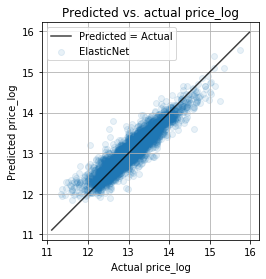

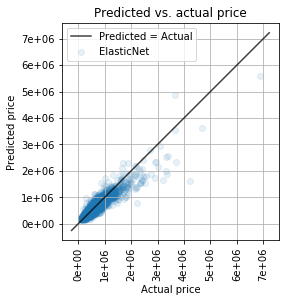

In [89]:
# predicted vs. observed plot
# price_log
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_enet_test, label='ElasticNet', alpha=0.1)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=10, label='Predicted = Actual')
ax.set_xlabel('Actual price_log')
ax.set_ylabel('Predicted price_log')
ax.set_title('Predicted vs. actual price_log')
ax.set_aspect('equal')
ax.legend()
ax.grid()
plt.show()

# price
fig, ax = plt.subplots()
ax.scatter(np.exp(y_test), np.exp(y_pred_enet_test), label='ElasticNet', alpha=0.1)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=10, label='Predicted = Actual')
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.set_xlabel('Actual price')
ax.set_ylabel('Predicted price')
ax.set_title('Predicted vs. actual price')
ax.set_aspect('equal')
ax.legend()
ax.grid()
ax.set_xticks(np.arange(0, ax.get_xlim()[1], 1e6))
ax.set_yticks(np.arange(0, ax.get_ylim()[1], 1e6))
plt.xticks(rotation=90)
plt.show()

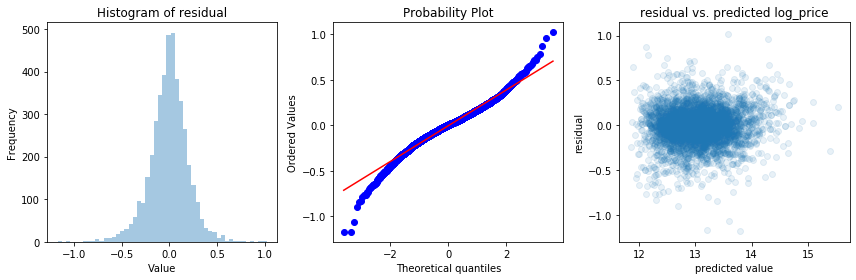

In [90]:
# residual diagnostic plots
fig, axs = plt.subplots(1,3, figsize=(12,4))
sns.distplot((y_test-y_pred_enet_test), kde=False,bins=50, ax=axs[0]);
axs[0].set_title('Histogram of residual')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Value')
ss.probplot((y_test-y_pred_enet_test), plot=axs[1])
axs[2].scatter(y_pred_enet_test, (y_test-y_pred_enet_test), alpha=0.1)
axs[2].set_ylabel('residual')
axs[2].set_xlabel('predicted value')
axs[2].set_title('residual vs. predicted log_price')
fig.tight_layout()
plt.show()

Total features: 83; Selected features: 74


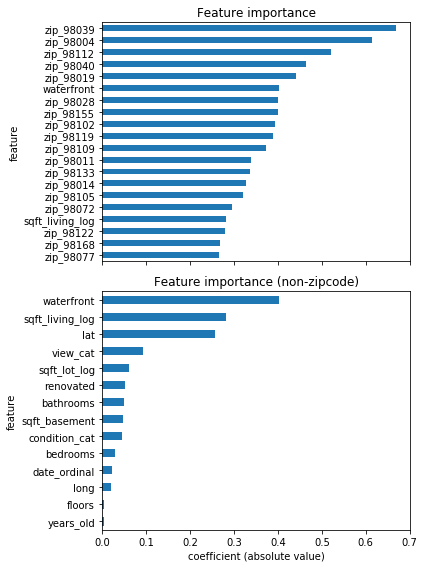

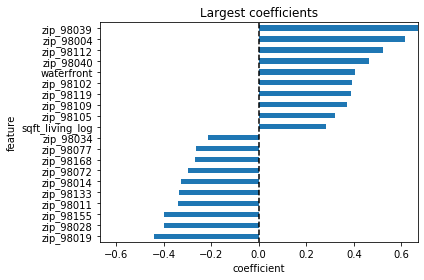

In [91]:
# evaluate feature importance based on coefficients
feat_imp = pd.Series(index = X_train.columns, data = np.abs(elastic_net.coef_))
# number of features with non-zero coefficients
n_selected_features = (feat_imp>0).sum()
print('Total features: {}; Selected features: {}'.format(X_train.shape[1], n_selected_features))
# number of features with non-zero coefficients, excluding zipcodes
non_zip_feat_imp = feat_imp[~feat_imp.index.str.startswith('z')]

# plot feature importantance/coefficients
fig, axs = plt.subplots(2,1, figsize=(6,8), sharex=True)
feat_imp.sort_values(ascending=False).head(20).plot(kind='barh', ax=axs[0])
non_zip_feat_imp.sort_values(ascending=False).plot(kind='barh', ax=axs[1])
for ax in axs:
    ax.invert_yaxis()
    ax.set_ylabel('feature')
    ax.set_xlabel('coefficient (absolute value)')
axs[0].set_title('Feature importance')
axs[1].set_title('Feature importance (non-zipcode)')
fig.tight_layout()
plt.show()

# plot largest coefficients (signed)
coeff_en = pd.Series(index = X_train.columns, data = elastic_net.coef_)
top10 = coeff_en.sort_values(ascending=False).head(10)
bot10 = coeff_en.sort_values(ascending=False).tail(10)
top10_bot10 = pd.concat([top10, bot10])
fig, ax = plt.subplots(figsize=(6,4))
top10_bot10.plot(kind='barh', ax=ax)
ax.invert_yaxis()
ax.set_xlim(-np.abs(top10_bot10).max(), np.abs(top10_bot10).max())
ax.set_ylabel('feature')
ax.set_xlabel('coefficient')
ax.set_title('Largest coefficients')
ax.axvline(x=0, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', ls='--')
fig.tight_layout()
plt.show()

#### Regularized linear regression (Elastic net) summary:
<ul>
    <li>From the residual diagnostic plots (histogram, Q-Q Normal plot, and residuals vs. predicted values): the residuals appear to be reasonably close a normal distribution, but deviations at the tails are evident and the Q-Q plot takes on an S-shape. The distribution of residuals does not change with predicted values.</li>
    <li>An adjusted R2 of 0.86 suggest that the model explains 86% of the variance of the original data and is a reasonable fit.</li>
    <li>The optimal L1 ratio of 1 suggests that the LASSO solution is optimal. Elastic net selected 74 of the 83 features.</li>
    <li>Overall, predicted results and model statistics are very similar to the baseline linear regression model.</li>
</ul>

##### Model 3: Support vector regression (SVR)<a name="model3"></a>
A nonparametric technique relying on kernel functions

##### Linear kernel

In [92]:
# support vector regression with linear kernel
svr = SVR(kernel='linear')
print(svr)

# fit and predict
svr.fit(X_train, y_train)
y_pred_train_svr = svr.predict(X_train)
y_pred_test_svr = svr.predict(X_test)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


In [93]:
# model evaluation
RMSE_train_svr = np.sqrt(mean_squared_error(y_train, y_pred_train_svr))
RMSE_test_svr = np.sqrt(mean_squared_error(y_test, y_pred_test_svr))

ntrain = X_train.shape[0]
ptrain = X_train.shape[1]
ntest = X_test.shape[0]
ptest = X_test.shape[1]

print('RMSE train: {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train_svr))))
print('RMSE test: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test_svr))))

print('\nAdj R2 train: {}'.format(1-(1-r2_score(y_train, y_pred_train_svr))*(ntrain-1)/(ntrain-ptrain-1)))
print('Adj R2 test: {}'.format(1-(1-r2_score(y_test, y_pred_test_svr))*(ntest-1)/(ntest-ptest-1)))

RMSE train: 0.19224207952438668
RMSE test: 0.19682438664711735

Adj R2 train: 0.8653574335844577
Adj R2 test: 0.8607659737216325


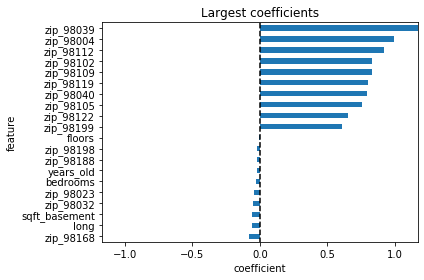

In [94]:
# plot largest coefficients (signed)
coeff_svr = pd.Series(index = X_train.columns, data = svr.coef_[0])
top10 = coeff_svr.sort_values(ascending=False).head(10)
bot10 = coeff_svr.sort_values(ascending=False).tail(10)
top10_bot10 = pd.concat([top10, bot10])
fig, ax = plt.subplots(figsize=(6,4))
top10_bot10.plot(kind='barh', ax=ax)
ax.invert_yaxis()
ax.set_xlim(-np.abs(top10_bot10).max(), np.abs(top10_bot10).max())
ax.set_ylabel('feature')
ax.set_xlabel('coefficient')
ax.set_title('Largest coefficients')
ax.axvline(x=0, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', ls='--')
fig.tight_layout()
plt.show()

##### RBF kernel

In [95]:
# support vector regression with rbf kernel
# features are alredy scaled
svr2 = SVR(kernel='rbf', gamma='auto')
# print model parameters
print(svr2)

# fit and predict
svr2.fit(X_train, y_train)
y_pred_train_svr2 = svr2.predict(X_train)
y_pred_test_svr2 = svr2.predict(X_test)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [96]:
# model evaluation
RMSE_train_svr2 = np.sqrt(mean_squared_error(y_train, y_pred_train_svr2))
RMSE_test_svr2 = np.sqrt(mean_squared_error(y_test, y_pred_test_svr2))

print('RMSE train: {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train_svr2))))
print('RMSE test: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test_svr2))))
print('\nAdj R2 train: {}'.format(1-(1-r2_score(y_train, y_pred_train_svr2))*(ntrain-1)/(ntrain-ptrain-1)))
print('Adj R2 test: {}'.format(1-(1-r2_score(y_test, y_pred_test_svr2))*(ntest-1)/(ntest-ptest-1)))

RMSE train: 0.17669431637522126
RMSE test: 0.18484510576963292

Adj R2 train: 0.8862554413730077
Adj R2 test: 0.877198554041192


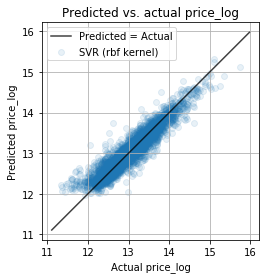

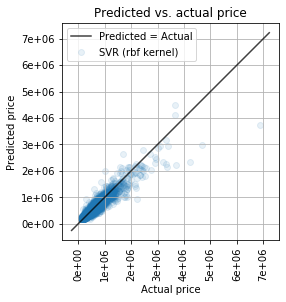

In [97]:
# predicted vs. observed plot for rbf kernel
# price_log
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test_svr2, label='SVR (rbf kernel)', alpha=0.1)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=10, label='Predicted = Actual')
ax.set_xlabel('Actual price_log')
ax.set_ylabel('Predicted price_log')
ax.set_title('Predicted vs. actual price_log')
ax.set_aspect('equal')
ax.legend()
ax.grid()
plt.show()

# price
fig, ax = plt.subplots()
ax.scatter(np.exp(y_test), np.exp(y_pred_test_svr2), label='SVR (rbf kernel)', alpha=0.1)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=10, label='Predicted = Actual')
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.set_xlabel('Actual price')
ax.set_ylabel('Predicted price')
ax.set_title('Predicted vs. actual price')
ax.set_aspect('equal')
ax.legend()
ax.grid()
ax.set_xticks(np.arange(0, ax.get_xlim()[1], 1e6))
ax.set_yticks(np.arange(0, ax.get_ylim()[1], 1e6))
plt.xticks(rotation=90)
plt.show()

#### SVR summary:
<ul>
    <li>The rbf kernel produced better model metrics compared to the linear kernel: lower RMSE and higher adjusted R2. However, the rbf kernel does not provide feature coefficients.</li>
    <li>Using the linear kernel, features with largest coefficients are similar to the elastic net model, for example zipcodes 98039, 98004, 98112, etc</li>
    <li>Using the rbf kernel, an adjusted R2 of 0.88 suggest that the model explains 88% of the variance of the original data and is a reasonable fit.</li>
    <li>Overall, predicted results and model statistics for SVR are similar to the baseline linear regression and the regularized linear regression models.</li>
</ul>

##### Model 4: XGBoost<a name="model4"></a>
A decision-tree-based ensemble algorithm that uses a gradient boosting framework

##### Additional data Preparation
Since XGBRegressor does not accept the category dtype, one hot encode the features in question

In [98]:
# one hot encode view_cat and condition_cat
X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()
X_train_xgb = pd.get_dummies(X_train_xgb, prefix=['view', 'condition'], columns=['view_cat', 'condition_cat'], drop_first=True)
X_test_xgb = pd.get_dummies(X_test_xgb, prefix=['view', 'condition'], columns=['view_cat', 'condition_cat'], drop_first=True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Adj R2 train: 0.8906985605520852
Adj R2 test: 0.8769578002768699

RMSE train: 0.1731786979307935
RMSE test: 0.18489522058826596


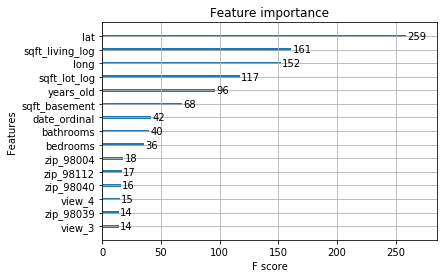

In [99]:
# use XGBRegressor
xgbregressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200)
# print model parameters
print(xgbregressor)

# fit and predict
xgbregressor.fit(X_train_xgb, y_train)
y_pred_train_xgb = xgbregressor.predict(X_train_xgb)
y_pred_test_xgb = xgbregressor.predict(X_test_xgb)

# model evaluation
ntrain = X_train_xgb.shape[0]
ptrain = X_train_xgb.shape[1]
ntest = X_test_xgb.shape[0]
ptest = X_test_xgb.shape[1]

print('\nAdj R2 train: {}'.format(1-(1-r2_score(y_train, y_pred_train_xgb))*(ntrain-1)/(ntrain-ptrain-1)))
print('Adj R2 test: {}'.format(1-(1-r2_score(y_test, y_pred_test_xgb))*(ntest-1)/(ntest-ptest-1)))
print('\nRMSE train: {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))))
print('RMSE test: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))))

# plot feature importance
xgb.plot_importance(xgbregressor, max_num_features=15);

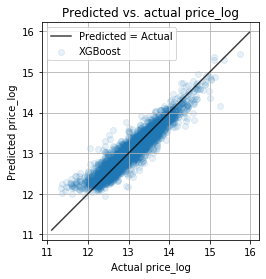

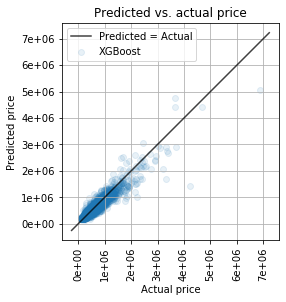

In [100]:
# predicted vs. observed plot
# price_log
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test_xgb, label='XGBoost', alpha=0.1)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=10, label='Predicted = Actual')
ax.set_xlabel('Actual price_log')
ax.set_ylabel('Predicted price_log')
ax.set_title('Predicted vs. actual price_log')
ax.set_aspect('equal')
ax.legend()
ax.grid()
plt.show()

# price
fig, ax = plt.subplots()
ax.scatter(np.exp(y_test), np.exp(y_pred_test_xgb), label='XGBoost', alpha=0.1)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=10, label='Predicted = Actual')
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
ax.set_xlabel('Actual price')
ax.set_ylabel('Predicted price')
ax.set_title('Predicted vs. actual price')
ax.set_aspect('equal')
ax.legend()
ax.grid()
ax.set_xticks(np.arange(0, ax.get_xlim()[1], 1e6))
ax.set_yticks(np.arange(0, ax.get_ylim()[1], 1e6))
plt.xticks(rotation=90)
plt.show()

#### XGBoost summary:
<ul>
    <li>While the XGBoost model could be further tuned, the parameters used yielded a reasonable result. An adjusted R2 of 0.89 suggest that the model explains 89% of the variance of the original data.</li>
    <li>Overall, predicted results and model statistics for XGBoost are similar to the other previous models.</li>
    <li>For this tree-based model, most important features were lat, sqft_living_log, long, sqft_lot_log, and years_old. Zipcode features were less important in this model, but amongst the zipcode features, 98004, 98039, 98112, and 98040 were the most important, consistent with SVR and Elastic net models.</li>
</ul>

##### Model comparison

In [101]:
# Compare adjusted R2 of all models from 10-fold cross validation on train set
r2_scores_lr = cross_val_score(regressor, X_train, y_train, cv=10)
r2_scores_en = cross_val_score(elastic_net, X_train, y_train, cv=10)
r2_scores_svr = cross_val_score(svr, X_train, y_train, cv=10)
r2_scores_svr2 = cross_val_score(svr2, X_train, y_train, cv=10)
r2_scores_xgb = cross_val_score(xgbregressor, X_train_xgb, y_train, cv=10)

In [102]:
# compute adjusted R2 
ntrain = X_train.shape[0]
ptrain = X_train.shape[1]
adj_r2_cv_lr = 1-(1-r2_scores_lr.mean())*(ntrain-1)/(ntrain-ptrain-1)
adj_r2_cv_en = 1-(1-r2_scores_en.mean())*(ntrain-1)/(ntrain-ptrain-1)
adj_r2_cv_svr = 1-(1-r2_scores_svr.mean())*(ntrain-1)/(ntrain-ptrain-1)
adj_r2_cv_svr2 = 1-(1-r2_scores_svr2.mean())*(ntrain-1)/(ntrain-ptrain-1)

ntrain = X_train_xgb.shape[0]
ptrain = X_train_xgb.shape[1]
adj_r2_cv_xgb = 1-(1-r2_scores_xgb.mean())*(ntrain-1)/(ntrain-ptrain-1)

# print results dataframe
mod_comp = pd.DataFrame([r2_scores_lr.mean(), r2_scores_en.mean(), r2_scores_svr.mean(), r2_scores_svr2.mean(), r2_scores_xgb.mean()],
                         columns=['R2 (CV-10)'], index=['lin regress', 'elastic net', 'svr-lin', 'svr-rbf', 'xgboost'])
mod_comp['Adjusted R2 (CV-10)'] = [adj_r2_cv_lr, adj_r2_cv_en, adj_r2_cv_svr, adj_r2_cv_svr2, adj_r2_cv_xgb]
mod_comp['RMSE test'] = [np.sqrt(mean_squared_error(y_test, y_pred_test_lr)), np.sqrt(mean_squared_error(y_test, y_pred_enet_test)),
                         np.sqrt(mean_squared_error(y_test, y_pred_test_svr)), np.sqrt(mean_squared_error(y_test, y_pred_test_svr2)), np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))]
mod_comp

,R2 (CV-10),Adjusted R2 (CV-10),RMSE test
lin regress,0.864613,0.863960,0.196238
elastic net,0.859178,0.858499,0.199320
svr-lin,0.864219,0.863564,0.196824
svr-rbf,0.880253,0.879676,0.184845
xgboost,0.876590,0.875951,0.184895


##### Model conlcusion
Cross-validated R2/adjusted R2 scores were comparable between the models, with the variance explained score different between 0.86-0.88. On the test set, the SVR (rbf kernel) and xgboost were the most accurate. However, for better interpretability one may prefer the linear regression/elastic net which provide feature coefficients (or the SVR linear kernel, which also provides the feature weights).

For discussion on feature importance please see Section 3 summary.

[Back to Section 3 summary](#Section3summary)<p>
[Back to Table of Contents](#Contents)

In [103]:
# clear defined variables before running the next section
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Section 4 /  Assignment 9: Predict whether house price exceeds 500K (reframed as a binary classification problem)<a name="Section4"></a>
##### Instructions


1. Leverage Naïve Bayes algorithm to classify build a model using the data from previous milestones.
2. Briefly summarize your findings on using Naïve Bayes.
3. Is Naïve Bayes more accurate than the regression model you used in Milestone 3?

As part of the modeling process, you might need to convert the data into categorical form to apply Naïve Bayes.<br>
As a hint, if you have numerical attributes, use binning to convert them to categorical.

### Solution for Section 4
For this part of the project, the problem is reframed as a binary classification problem: predict whether house price exceeds 500K

### Summary of findings for Section 4:<a name="Section4summary"></a>
<ul>
    <li>
A Multinomial Naive Bayes classifier was used for a binary classification problem: to predict whether house price exceeds 500K.
    </li>
<li>
Numerical attributes were binned and converted to categorical. The "price" column was converted to the label "price_bin", with 0=less than or equal to 500K and 1=greater than 500K.
    </li>
<li>
The model was evaluated based on confusion matrix-derived metrics and area under the ROC curve. For confusion matrix-derived metrics, the ROC curve was used to help pick a probability threshold, and the point on the ROC curve that was closest to the top-left corner was selected (here, probability threshold of 0.4).
    </li>
<li>
From the resultant confusion matrix, the macro average precision was 0.73, recall was 0.74, and f-1 score was 0.73. Accuracy was 0.73. (For class 1: price>500K, f-1 score was slightly lower than for class 0: price<=500K)</li>
    <li>The area under the ROC curve was 0.82.
    </li>


<li>Overall, these results are reasonable, given that most features were binned and thus resulting in the loss of information. Different binning strategies could be explored to improve model performance.</li>

#### 1. Leverage Naïve Bayes algorithm to classify build a model using the data from previous milestones.

In [104]:
# Load necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

# Load and view data
url = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
house_orig = pd.read_csv(url)
house_orig.head()

# make a copy of the dataframe
house = house_orig.copy()

##### Data preparation
Strategy: convert numeric data into categorical form by binning

In [105]:
# all columns except date are of int/float type 
# find number of NANs/missing values
print('data types:')
print(house.dtypes)
print('\nnumber of nan values: {}'.format(house.isna().sum().sum()))

data types:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

number of nan values: 0


In [106]:
# drop id, since it appears to be independent of price 
# it is a "key", with with almost as many unique values as observations
print('unique values for id: {}'.format(house['id'].nunique()))
cols_to_drop = ['id']

unique values for id: 21436


In [107]:
# date may be useful as a feature, even though the data only spans 1 year
# change date to ordinal, then make 10 equal-sized bins
house['date'] = pd.to_datetime(house['date'])
house['date_bin'] = house['date'].map(dt.datetime.toordinal)
house['date_bin'] = pd.qcut(house['date_bin'], 10)
# print('verify # observations after binning: {}'.format(house['date_bin'].value_counts().sum()))
cols_to_drop.append('date')
cols_to_encode = ['date_bin']

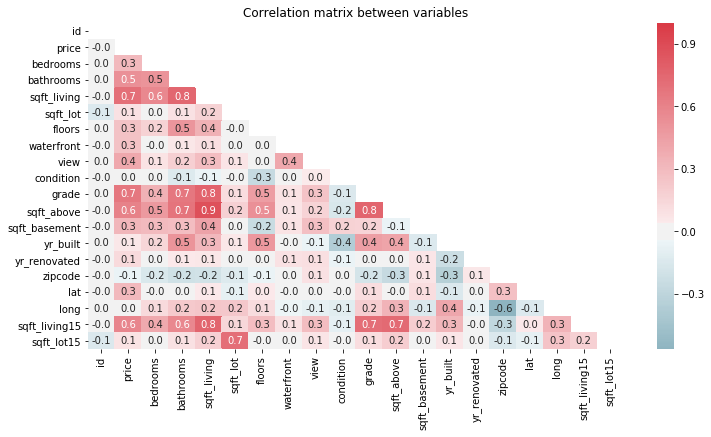

In [108]:
# Examine correlation between variables.
corrmat = house.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True) # diverging colormap
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
sns.heatmap(corrmat, mask=mask, annot=True, cmap=cmap, fmt='.1f', center=0, ax=ax)
ax.set_title('Correlation matrix between variables')
plt.show()

In [109]:
# find pairs with highest correlations (corr coeff>0.6)
corrmat = house.corr().abs()
np.fill_diagonal(corrmat.values, np.nan)
corr_series = corrmat.unstack()
corr_series_ordered = corr_series.sort_values(ascending=False)
print('pairs with the highest correlation:\n(variable 1, variable 2, correlation coeff)')
corr_series_ordered[corr_series_ordered>0.6][1::2]

pairs with the highest correlation:
(variable 1, variable 2, correlation coeff)


sqft_living    sqft_above     0.876597
grade          sqft_living    0.762704
sqft_living15  sqft_living    0.756420
grade          sqft_above     0.755923
bathrooms      sqft_living    0.754665
sqft_living15  sqft_above     0.731870
sqft_lot15     sqft_lot       0.718557
sqft_living15  grade          0.713202
price          sqft_living    0.702035
sqft_above     bathrooms      0.685342
grade          price          0.667434
bathrooms      grade          0.664983
price          sqft_above     0.605567
dtype: float64

In [110]:
# bins for price: <=500K, >500K
house['price_bin'] = pd.cut(house['price'], bins=[0, 5e5, np.max(house['price'])], labels=[0, 1], include_lowest=True)
# print('verify # observations after binning: {}'.format(house['price_bin'].value_counts().sum()))
cols_to_drop.append('price')

In [111]:
# bins for bedrooms: <=3, >3
house['bedrooms_bin'] = pd.cut(house['bedrooms'], bins=[0, 3, np.max(house['bedrooms'])], labels=[0, 1], include_lowest=True)
# print('verify # observations after binning: {}'.format(house['bedrooms_bin'].value_counts().sum()))
cols_to_drop.append('bedrooms')

In [112]:
# bins for bathrooms: <=2, >2
house['bathrooms_bin'] = pd.cut(house['bathrooms'], bins=[0, 2, np.max(house['bathrooms'])], labels=[0, 1], include_lowest=True)
house['bathrooms_bin'].value_counts()
# print('verify # observations after binning: {}'.format(house['bathrooms_bin'].value_counts().sum()))
cols_to_drop.append('bathrooms')

In [113]:
# bins for sqft_living: 10 equal-sized bins
house['sqft_living_bin'] = pd.qcut(house['sqft_living'], 10)
# print('verify # observations after binning: {}'.format(house['sqft_living_bin'].value_counts().sum()))
cols_to_drop.append('sqft_living')
cols_to_encode.append('sqft_living_bin')

In [114]:
# bins for sqft_lot: 10 equal-sized bins
house['sqft_lot_bin'] = pd.qcut(house['sqft_lot'], 10)
# print('verify # observations after binning: {}'.format(house['sqft_lot_bin'].value_counts().sum()))
cols_to_drop.append('sqft_lot')
cols_to_encode.append('sqft_lot_bin')

In [115]:
# bins for floors: <=1, >1
house['floors_bin'] = pd.cut(house['floors'], bins=[0, 1, np.max(house['floors'])], labels=[0, 1], include_lowest=True)
# print('verify # observations after binning: {}'.format(house['floors_bin'].value_counts().sum()))
cols_to_drop.append('floors')

In [116]:
# change waterfront to categorical
house['waterfront'] = house['waterfront'].astype('category')

In [117]:
# view, condition, grade are categorical because they have a small number of discrete numeric values and are qualitative.
# function to convert ordinal variables to category type
def custom_ordinal_encoder(col):
    cat_dtype = pd.api.types.CategoricalDtype(categories=sorted(house[col].unique()), ordered=True)
    return house[col].astype(cat_dtype)

# convert ordinal variables to category type
house['view_cat'] = custom_ordinal_encoder('view')
house['condition_cat'] = custom_ordinal_encoder('condition')
#house['grade_cat'] = custom_ordinal_encoder('grade')

# as shown above, grade is highly correlated with a number of variables (some of which also will not be selected for modeling):
# sqft_living, sqft_above, sqft_living15, bathrooms 
# exclude grade (but including grade also does not noticably change the predictions)
cols_to_drop.extend(['view', 'condition', 'grade'])

In [118]:
# sqft_living = sqft_above + sqft_basement; there are many zeros in sqft_basement, so sqft_above dominates sqft_living.
cols_to_drop.append('sqft_above')

In [119]:
# there are many zeros in sqft_basement; create new binary feature to indicate if house has basement or not
house['basement_cat'] = house['sqft_basement'].apply(lambda yr: 0 if yr == 0 else 1)
house['basement_cat'] = house['basement_cat'].astype('category')
cols_to_drop.append('sqft_basement')

In [120]:
# bins for yr_built: 10 equal-sized bins
house['yr_built_bin'] = pd.qcut(house['yr_built'], 10)
# print('verify # observations after binning: {}'.format(house['yr_built_bin'].value_counts().sum()))
cols_to_drop.append('yr_built')
cols_to_encode.append('yr_built_bin')

In [121]:
# there are many zeros in yr_renovated; create new binary feature renovated to indicate if house has been renovated or not
house['renovated'] = house['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)
house['renovated'] = house['renovated'].astype('category')
cols_to_drop.append('yr_renovated')

In [122]:
# encode zipcode
cols_to_encode.append('zipcode')

In [123]:
# bins for lat: 10 equal-sized bins
house['lat_bin'] = pd.qcut(house['lat'], 10)
# print('verify # observations after binning: {}'.format(house['lat_bin'].value_counts().sum()))
cols_to_drop.append('lat')
cols_to_encode.append('lat_bin')

In [124]:
# bins for long: 10 equal-sized bins
house['long_bin'] = pd.qcut(house['long'], 10)
# print('verify # observations after binning: {}'.format(house['long_bin'].value_counts().sum()))
cols_to_drop.append('long')
cols_to_encode.append('long_bin')

In [125]:
# sqft_living15, sqft_lot15 are colinear to other features of similar names (sqft_living, sqft_lot, respectively). Differences between these similar named variables are unclear.
# drop sqft_living15, sqft_lot15
cols_to_drop.extend(['sqft_living15', 'sqft_lot15'])

In [126]:
# encode new variables
enc = OrdinalEncoder()
house[cols_to_encode] = enc.fit_transform(house[cols_to_encode])
house['zipcode'] = house['zipcode'].astype(int)
house[cols_to_encode] = house[cols_to_encode].astype(int).astype('category')

# drop designated columns
house.drop(cols_to_drop, axis=1, inplace=True)

In [127]:
# view dataset
house.head()

,waterfront,zipcode,date_bin,price_bin,bedrooms_bin,bathrooms_bin,sqft_living_bin,sqft_lot_bin,floors_bin,view_cat,condition_cat,basement_cat,yr_built_bin,renovated,lat_bin,long_bin
0,0,66,4,0,0,0,1,3,0,0,3,0,2,0,3,4
1,0,55,6,1,0,1,7,4,1,0,3,1,2,1,8,2
2,0,16,7,0,0,0,0,7,0,0,3,0,1,0,9,4
3,0,58,6,1,1,1,5,2,0,0,5,1,3,0,3,0
4,0,37,7,1,0,0,3,5,0,0,3,0,6,0,5,8


##### Train/test split

In [128]:
# train/test split
y = house['price_bin']
#X = house.loc[:, ~house.columns.isin(['price_bin'])]
# better area under ROC curve when zipcode excluded
X = house.loc[:, ~house.columns.isin(['price_bin', 'zipcode'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('features: {}'.format(X.columns.values))

features: ['waterfront' 'date_bin' 'bedrooms_bin' 'bathrooms_bin' 'sqft_living_bin'
 'sqft_lot_bin' 'floors_bin' 'view_cat' 'condition_cat' 'basement_cat'
 'yr_built_bin' 'renovated' 'lat_bin' 'long_bin']


##### Naive Bayes model

In [129]:
mnb = MultinomialNB() # use default laplace smoothing
mnb.fit(X_train, y_train)

y_pred_mnb = mnb.predict(X_test)
y_prob_mnb = mnb.predict_proba(X_test)

# confusion matrix based on default 0.5 probability threshold
print ('Confusion Matrix using default 0.5 probability threshold:')
print(confusion_matrix(y_test, y_pred_mnb)) 
print(classification_report(y_test, y_pred_mnb))

Confusion Matrix using default 0.5 probability threshold:
[[1974  503]
 [ 629 1217]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      2477
           1       0.71      0.66      0.68      1846

    accuracy                           0.74      4323
   macro avg       0.73      0.73      0.73      4323
weighted avg       0.74      0.74      0.74      4323



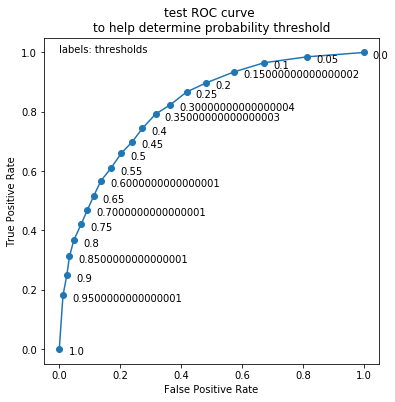

threshold on ROC curve that is closest to the top-left: 0.4


In [130]:
# Explore probability threshold:
# The ROC curve was used to help determine an appropriate probability threshold. 
# Specifically, a threshold that is based on the point in an ROC curve that is closest to the top-left corner was used.

# test a few thresholds from 0 to 1
test_thrs = np.arange(0, 1.05, 0.05)
temp_tprs = np.array([])
temp_fprs = np.array([])
for test_thr in test_thrs:
    # predict class labels based on custom threshold, using prob of classification for outcome/class 1
    temp_prediction = (y_prob_mnb[:,1]>test_thr).astype(int) 
    cm_temp = confusion_matrix(y_test, temp_prediction) # get confusion matrix
    tn_temp, fp_temp, fn_temp, tp_temp = cm_temp.ravel() 
    temp_tprs = np.append(temp_tprs, tp_temp/(tp_temp+fn_temp)) # get tprs to plot ROC curve
    temp_fprs = np.append(temp_fprs, fp_temp/(fp_temp+tn_temp)) # get fprs to plot ROC curve

# plot test ROC curve
plt.figure(figsize=[6,6])
plt.plot(temp_fprs, temp_tprs,'o-')
for i, x in enumerate(zip(temp_fprs, temp_tprs)):
    plt.text(x[0]+0.03, x[1]-0.02, test_thrs[i])
plt.title('test ROC curve \nto help determine probability threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(np.min(temp_fprs), np.max(temp_tprs), 'labels: thresholds')
plt.show()

# opt for the threshold that is based on the point in an ROC curve that is closest to the top-left corner
dist_top_left = np.sqrt((temp_tprs-1)**2+(temp_fprs-0)**2) # distance to top-left corner
thr = np.round(test_thrs[np.argmin(dist_top_left)],2) # specify custom threshold closest to top-left corner

print('threshold on ROC curve that is closest to the top-left: {}'.format(thr))

In [131]:
# predict class labels based on custom threshold, using prob of classification for outcome/class 1 (Price>500K)
y_pred_mnb_custom = (y_prob_mnb[:,1]>thr).astype(int)
# confusion matrix from predicted values
cm_mnb_custom = confusion_matrix(y_test, y_pred_mnb_custom)
print ('\nConfusion Matrix using probability threshold {}:'.format(thr))
print(cm_mnb_custom)
tn, fp, fn, tp = cm_mnb_custom.ravel()
print ('\nTP, TN, FP, FN:', tp, ',', tn, ',', fp, ',', fn)

# Classification report
print ('\nMetrics based on confusion matrix:')
print(classification_report(y_test, y_pred_mnb_custom))


Confusion Matrix using probability threshold 0.4:
[[1800  677]
 [ 472 1374]]

TP, TN, FP, FN: 1374 , 1800 , 677 , 472

Metrics based on confusion matrix:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      2477
           1       0.67      0.74      0.71      1846

    accuracy                           0.73      4323
   macro avg       0.73      0.74      0.73      4323
weighted avg       0.74      0.73      0.74      4323



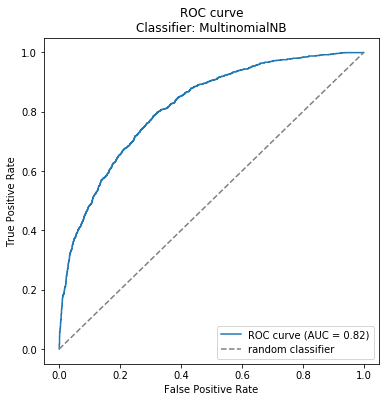

In [132]:
# Calculate the ROC curve and its AUC 
# get false positive rate, true posisive rate, probability thresholds
fpr, tpr, thrs = roc_curve(y_test, y_prob_mnb[:,1])
# get area under the curve
area_under_curve = auc(fpr, tpr)

# plot ROC curve with AUC score
plt.figure(figsize=[6,6])
plt.title('ROC curve\nClassifier: '+type(mnb).__name__)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], c='gray', linestyle='--', label='random classifier')
plt.legend(loc="lower right")
plt.show()

#### 2. Briefly summarize your findings on using Naïve Bayes.

<ul>
    <li>
A Multinomial Naive Bayes classifier was used for a binary classification problem: to predict whether house price exceeds 500K.
    </li>
<li>
Numerical attributes were binned and converted to categorical. The "price" column was converted to the label "price_bin", with 0=less than or equal to 500K and 1=greater than 500K.
    </li>
<li>
The model was evaluated based on confusion matrix-derived metrics and area under the ROC curve. For confusion matrix-derived metrics, the ROC curve was used to help pick a probability threshold, and the point on the ROC curve that was closest to the top-left corner was selected (here, probability threshold of 0.4).
    </li>
<li>
From the resultant confusion matrix, the macro average precision was 0.73, recall was 0.74, and f-1 score was 0.73. Accuracy was 0.73. (For class 1: price>500K, f-1 score was slightly lower than for class 0: price<=500K)</li>
    <li>The area under the ROC curve was 0.82.
    </li>


<li>Overall, these results are reasonable, given that most features were binned and thus resulting in the loss of information. Different binning strategies could be explored to improve model performance.</li>

#### 3. Is Naïve Bayes more accurate than the regression model you used in Milestone 3?

It is difficult to compare classification and regression models, as the two approaches return different types of outcomes. The Naive Bayes model predicted probabilities of being in each target class, whereas the regression model used in Milestone 3 predicted the numeric value of the target.

[Back to Section 4 summary](#Section4summary)<p>
[Back to Table of Contents](#Contents)<p>